# EDA Analysis on House Regression

# 1 - Getting Data Ready

This EDA work was done for a PhD Subject, the purpose of this work is to provide an extensive data analysis. Machine Learning will be used in this work, however, we don't fully explore its main features and hyper parameterization, they are a mere tool for our analysis.  

We decided to feature engineer two variables: (1) ‘FullBath’ and (2) ‘AgeAsset’. The first we just updated this value with the sum of 'HalfBath' and 'BsmtHalfBath', times a half to give us the full number of baths in a house. Secondly, to overcome the time issue we created a new variable ‘AgeAsset’ where we took the year that was sold (‘YrSold’) minus year it was built (‘YearBuilt’). Besides the variables used in the feature engineering process we decided to drop ‘GarageYrBlt’, 'LotFrontage', 'YearRemodAdd' and 'MoSold' due to the number of missing values. Regarding the remaining missing values we have imputed as zero in ‘MasVnrArea’, in ‘Electrical’ as there was only one missing value we imputed the median, and the remaining ‘MasVnrType’, 'Alley', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence' and 'MiscFeature', we imputed as the categorical value of ‘NA’ as these were not missing values as mentioned in the description on each variable. For our analysis we will use a total of 72 independent variables, of which 25 are numerical and 47 categorical.

## 1.1 - Importing Files and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('default')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.shape

(1460, 81)

## 1.2 - Fill in NA

In [5]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

data['MasVnrType'] = data['MasVnrType'].fillna('None')

for col in ['Alley','BsmtExposure','BsmtQual','BsmtCond','BsmtCond','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']:
    data[col] = data[col].fillna('NA')

data['Electrical'] = data['Electrical'].fillna('SBrkr') ### only one with median

data = data.set_index('Id')
target = data['SalePrice'].copy()


data['AgeAsset'] = data['YrSold'] - data['YearBuilt']
data['FullBath'] = data['FullBath'] +data['HalfBath'] *0.5 + 0.5*data['BsmtHalfBath']

data = data.drop(columns={'SalePrice','GarageYrBlt','LotFrontage','YearBuilt','YrSold','YearRemodAdd','MoSold','HalfBath','BsmtHalfBath'})

In [6]:
data.shape

(1460, 72)

In [7]:
data.isna().sum().sum()

0

## 1.3 - Selecting numerical and categorical columns 

In [8]:
datanum = ['LotArea','MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
           'FullBath','KitchenAbvGr','TotRmsAbvGrd','BedroomAbvGr',
           'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','AgeAsset']
datacat = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
            'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
            'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
            'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'KitchenQual', 'Functional',
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
            'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for col in datacat:
    data[col] = data[col].astype(str)
for col in datanum:
    data[col] = data[col].astype(float)

In [9]:
len(datanum)

25

In [10]:
len(datacat)

47

# 2 - Univariate Analysis

We can see that all are right skewed with a possibility of outliers in more extreme cases. They seem to not follow a normal distribution with the possibility of exception in ‘TotalBsmtSF’, ‘GrLivArea’, ‘1stFlrSF’and ‘GarageArea’. In Appendix we can find all descriptive statistics for these variables. We can analyse that some variables have a mean, median and third quartile equal to zero (e.g., ‘EnclosedPorch’) which could raise the question if we should use this variable, or if we should correct for outliers as these variables have the greatest number of data points greater than the normal threshold for outliers (1.5x IQR).

They show a positive skewness (Pearson’s skewness), except for ‘GarageCars’, which goes in line with the visual analysis made previously. The Kolmogorov-Smirnov (KS)  p-values are close to zero, which is below our critical value, therefore we will reject the hypothesis that all variables do not follow a Normal Distribution. The top five variables with most dispersions are ‘PoolArea’, ‘MiscVal’, ‘3SsnPorch’, ‘LowQualFinSF’ and ‘ScreenPorch with a Coefficient of Variation above 3,7.

We can conclude that all categorical variables do not follow a uniform distribution, and in some cases the frequency of some attributes is close to zero that will question the use of those variables in our analysis. This will be further discussed in our Bivariate analysis.

## 2.1 - Descriptive Analysis

In [11]:
stats_num = data.describe()
new = pd.DataFrame()
for col in datanum:
    new.loc[1,col] = stats.trim_mean(data[col], 0.1)
    new.loc[2,col] = data[col].skew()
    new.loc[3,col] = data[col].kurtosis()
    new.loc[4,col] = stats.kstest(((data[col]-data[col].mean())/data[col].std()),'norm')[1]
    new.loc[6,col] = data[col].std() / data[col].mean()
    new.loc[7,col] = np.quantile(data[col], 0.75) + (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5
    new.loc[8,col] = np.quantile(data[col], 0.25) - (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5
    new.loc[9,col] = len(data[col][(data[col] > np.quantile(data[col], 0.75) + (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5) |      (data[col] < np.quantile(data[col], 0.25) - (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5) ])
stats_num = stats_num.append(new)
stats_num = stats_num.rename(index={1:'trimmed mean', 2:'skew',3:'kurtosis',4:'ks p-value',5:'sw p-value',6:'Var Coef',7:'UL',8:'LL',9:'# Outliers'})
stats_num = stats_num.round(3)
stats_num.to_excel('stats.xlsx')
stats_num

LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count           1460.000    1460.000    1460.000    1460.000   1460.000   
mean           10516.828     103.117     443.640      46.549    567.240   
std             9981.265     180.731     456.098     161.319    441.867   
min             1300.000       0.000       0.000       0.000      0.000   
25%             7553.500       0.000       0.000       0.000    223.000   
50%             9478.500       0.000     383.500       0.000    477.500   
75%            11601.500     164.250     712.250       0.000    808.000   
max           215245.000    1600.000    5644.000    1474.000   2336.000   
trimmed mean    9563.284      62.541     386.076       1.383    519.289   
skew              12.208       2.678       1.686       4.255      0.920   
kurtosis         203.243      10.141      11.118      20.113      0.475   
ks p-value         0.000       0.000       0.000       0.000      0.000   
Var Coef           0.949       1.753       1.028       3.466      0.779   
UL             17673.500     410.625    1780.625       0.000   1685.500   
LL              1481.500    -246.375   -1068.375       0.000   -654.500   
# Outliers        69.000      98.000       7.000     167.000     29.000   

              TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  \
count            1460.000  1460.000  1460.000      1460.000   1460.000  ...   
mean             1057.429  1162.627   346.992         5.845   1515.464  ...   
std               438.705   386.588   436.528        48.623    525.480  ...   
min                 0.000   334.000     0.000         0.000    334.000  ...   
25%               795.750   882.000     0.000         0.000   1129.500  ...   
50%               991.500  1087.000     0.000         0.000   1464.000  ...   
75%              1298.250  1391.250   728.000         0.000   1776.750  ...   
max              6110.000  4692.000  2065.000       572.000   5642.000  ...   
trimmed mean     1036.695  1129.991   285.364         0.000   1467.670  ...   
skew                1.524     1.377     0.813         9.011      1.367  ...   
kurtosis           13.250     5.746    -0.553        83.235      4.895  ...   
ks p-value          0.000     0.000     0.000         0.000      0.000  ...   
Var Coef            0.415     0.333     1.258         8.319      0.347  ...   
UL               2052.000  2155.125  1820.000         0.000   2747.625  ...   
LL                 42.000   118.125 -1092.000         0.000    158.625  ...   
# Outliers         61.000    20.000     2.000        26.000     31.000  ...   

              GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count           1460.000    1460.000    1460.000     1460.000       1460.000   
mean               1.767     472.980      94.245       46.660         21.954   
std                0.747     213.805     125.339       66.256         61.119   
min                0.000       0.000       0.000        0.000          0.000   
25%                1.000     334.500       0.000        0.000          0.000   
50%                2.000     480.000       0.000       25.000          0.000   
75%                2.000     576.000     168.000       68.000          0.000   
max                4.000    1418.000     857.000      547.000        552.000   
trimmed mean       1.774     469.808      71.758       33.233          3.866   
skew              -0.343       0.180       1.541        2.364          3.090   
kurtosis           0.221       0.917       2.993        8.490         10.431   
ks p-value         0.000       0.000       0.000        0.000          0.000   
Var Coef           0.423       0.452       1.330        1.420          2.784   
UL                 3.500     938.250     420.000      170.000          0.000   
LL                -0.500     -27.750    -252.000     -102.000          0.000   
# Outliers         5.000      21.000      32.000       77.000        208.000   

              3SsnPorch  ScreenPorch

## 2.2 - Visualizing Single variable distribution

<Figure size 640x480 with 0 Axes>

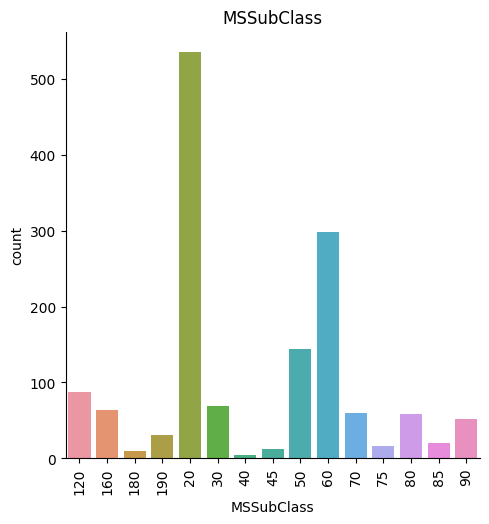

<Figure size 640x480 with 0 Axes>

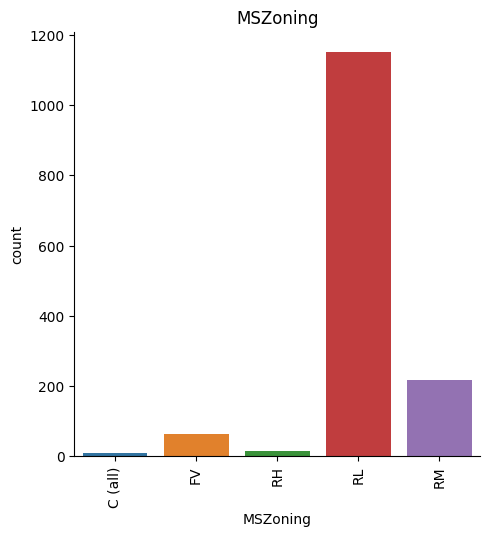

<Figure size 640x480 with 0 Axes>

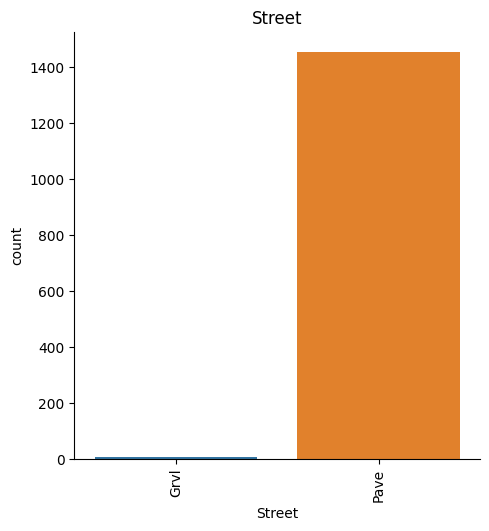

<Figure size 640x480 with 0 Axes>

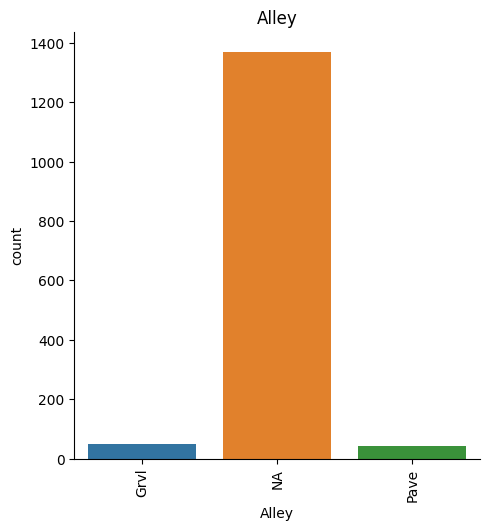

<Figure size 640x480 with 0 Axes>

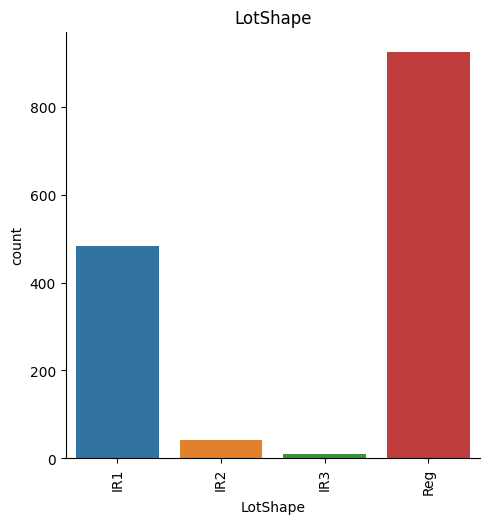

<Figure size 640x480 with 0 Axes>

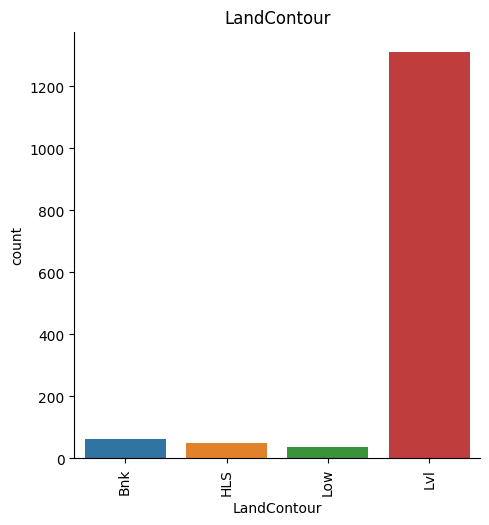

<Figure size 640x480 with 0 Axes>

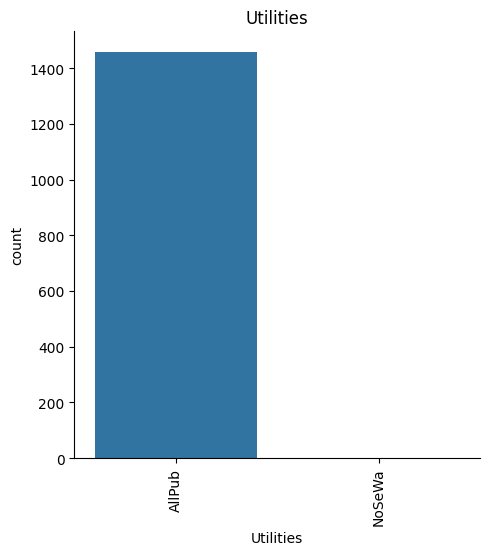

<Figure size 640x480 with 0 Axes>

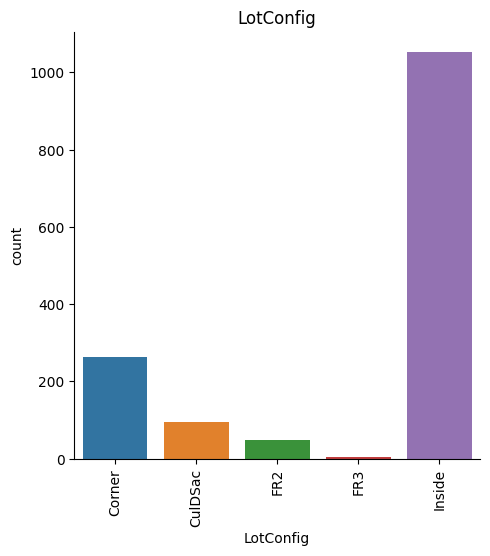

<Figure size 640x480 with 0 Axes>

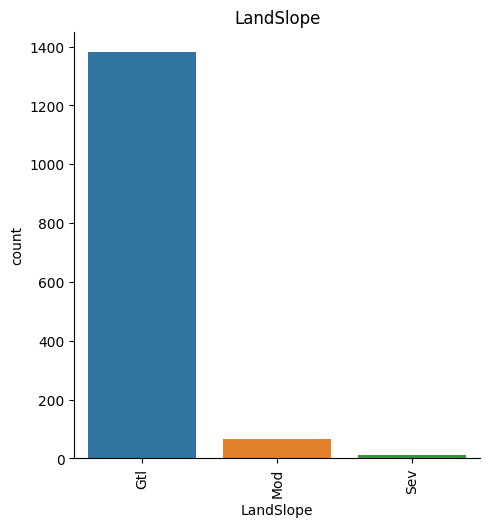

<Figure size 640x480 with 0 Axes>

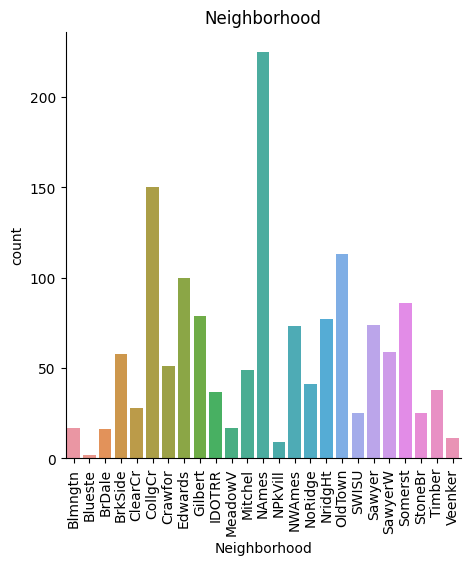

<Figure size 640x480 with 0 Axes>

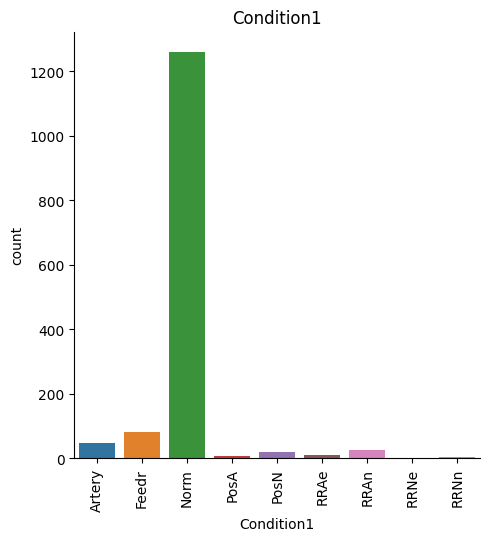

<Figure size 640x480 with 0 Axes>

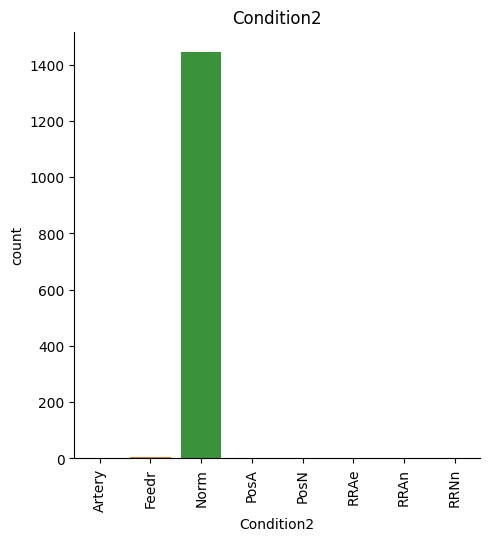

<Figure size 640x480 with 0 Axes>

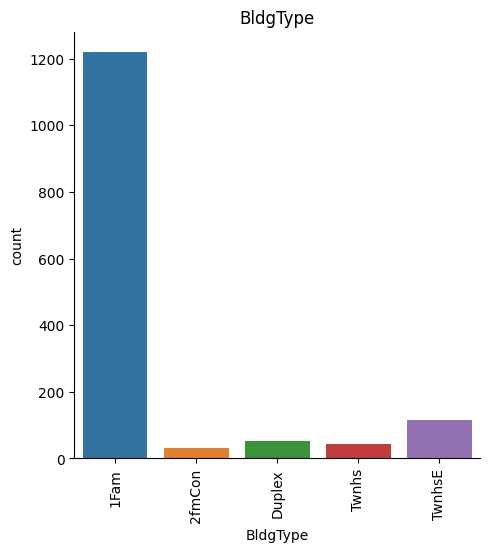

<Figure size 640x480 with 0 Axes>

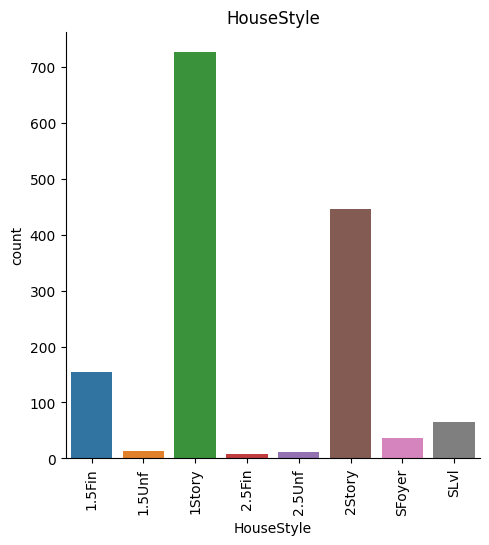

<Figure size 640x480 with 0 Axes>

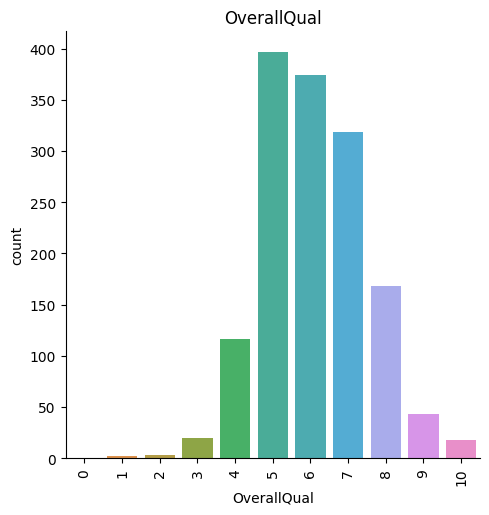

<Figure size 640x480 with 0 Axes>

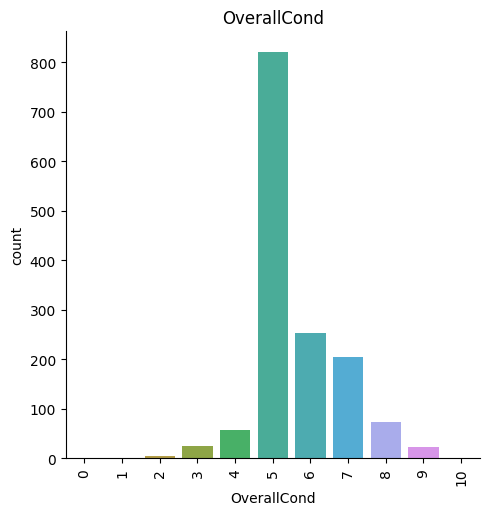

<Figure size 640x480 with 0 Axes>

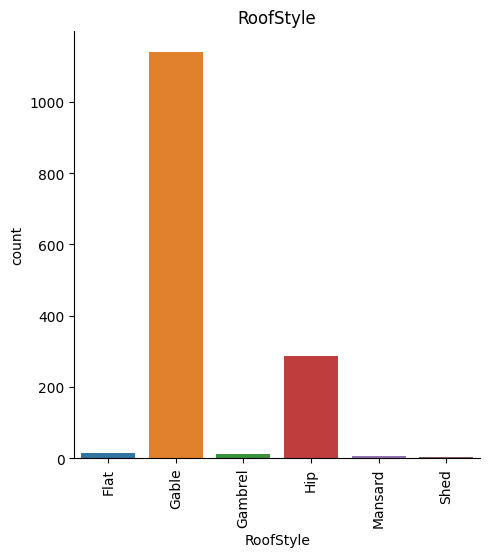

<Figure size 640x480 with 0 Axes>

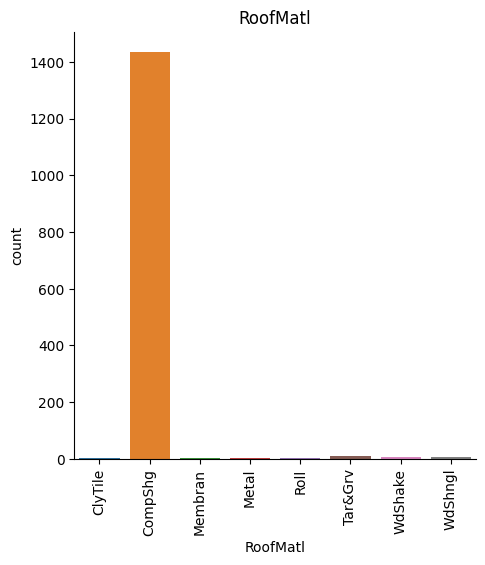

<Figure size 640x480 with 0 Axes>

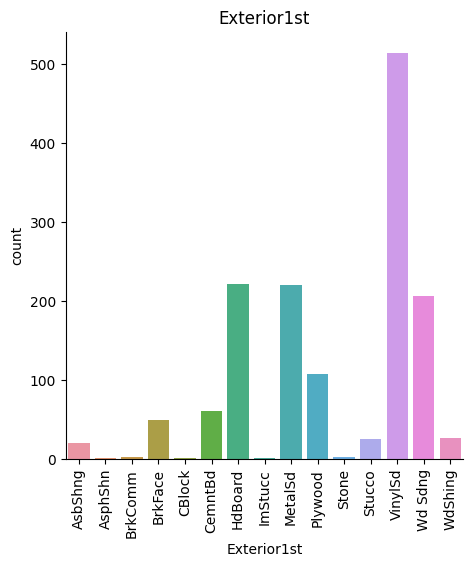

<Figure size 640x480 with 0 Axes>

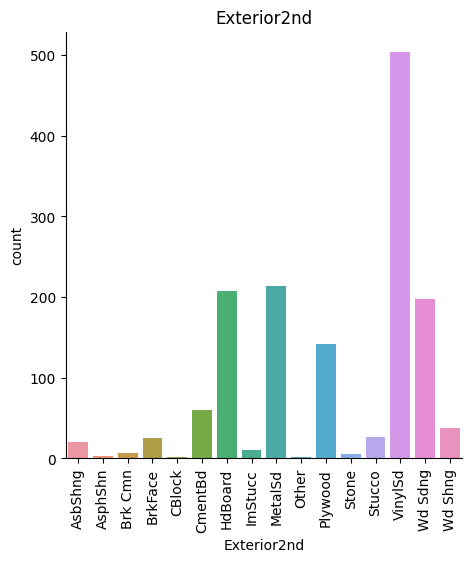

<Figure size 640x480 with 0 Axes>

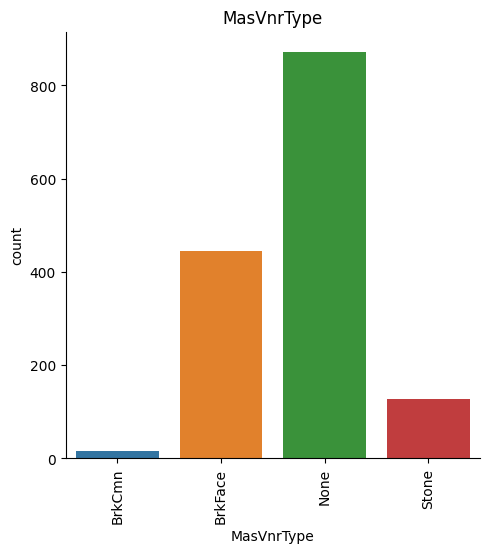

<Figure size 640x480 with 0 Axes>

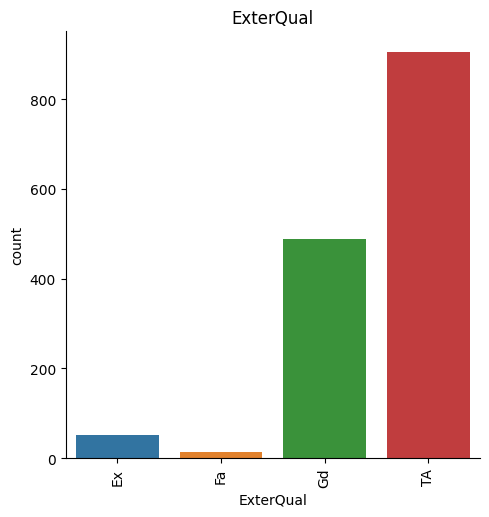

<Figure size 640x480 with 0 Axes>

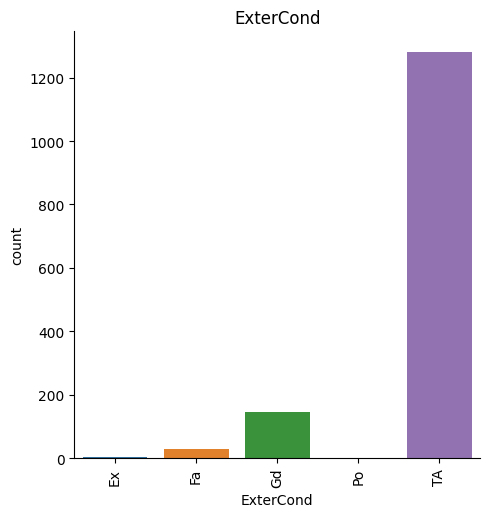

<Figure size 640x480 with 0 Axes>

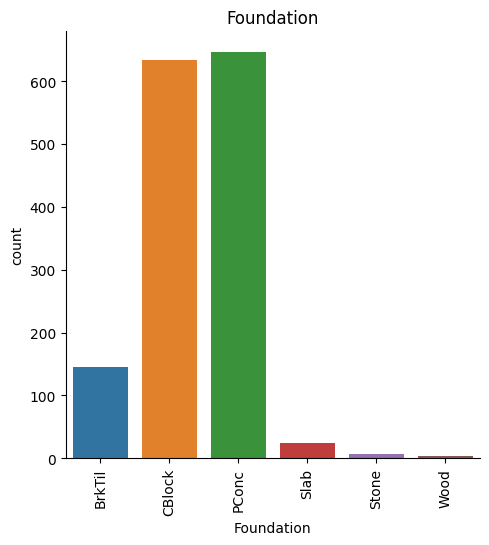

<Figure size 640x480 with 0 Axes>

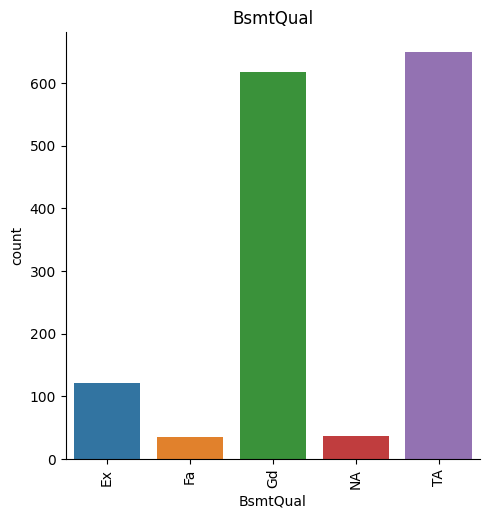

<Figure size 640x480 with 0 Axes>

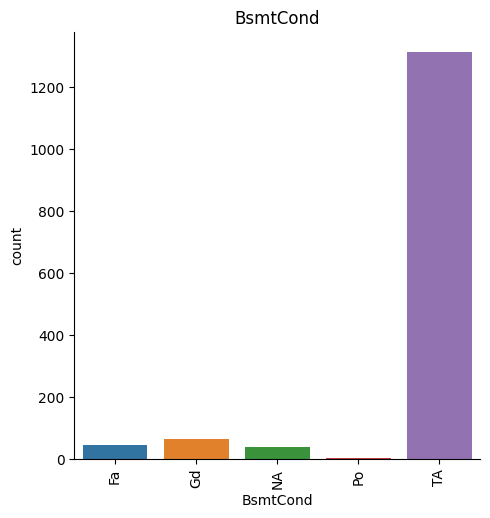

<Figure size 640x480 with 0 Axes>

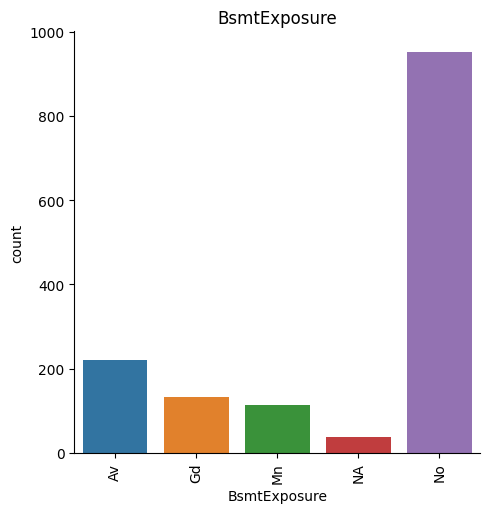

<Figure size 640x480 with 0 Axes>

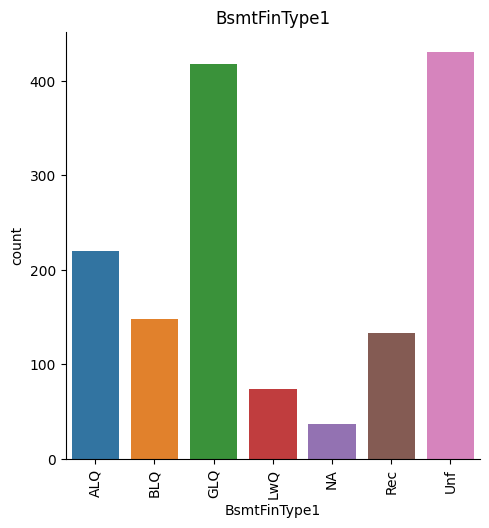

<Figure size 640x480 with 0 Axes>

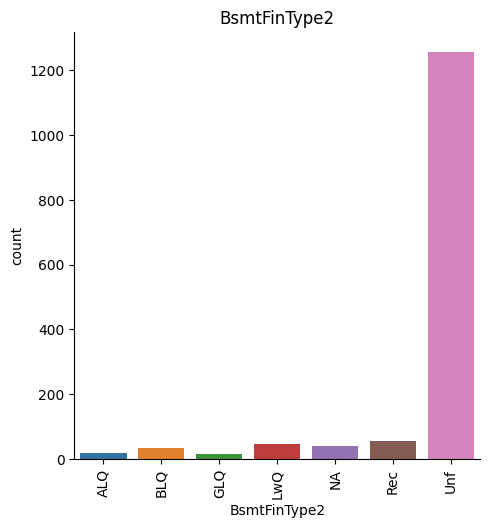

<Figure size 640x480 with 0 Axes>

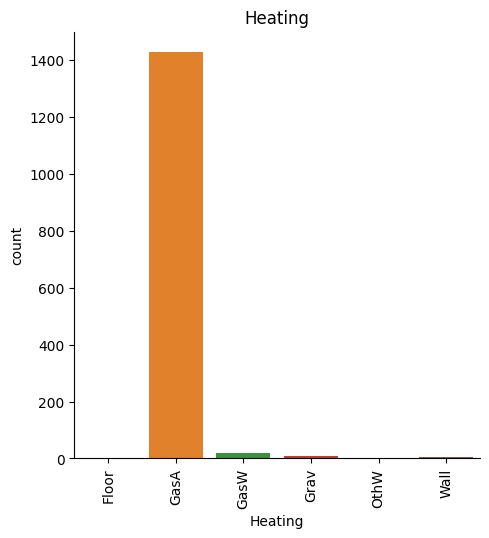

<Figure size 640x480 with 0 Axes>

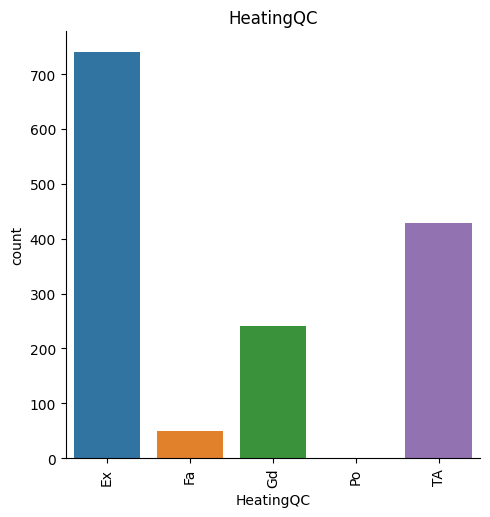

<Figure size 640x480 with 0 Axes>

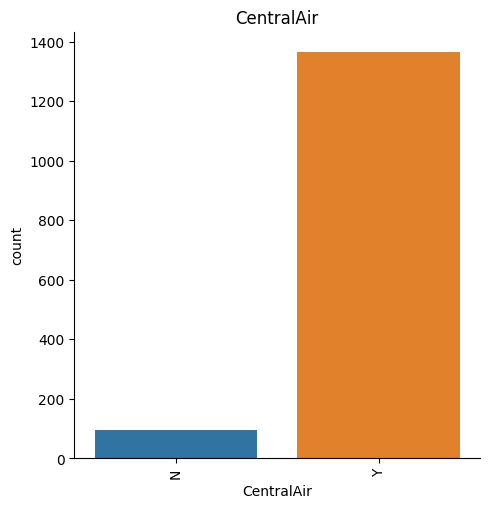

<Figure size 640x480 with 0 Axes>

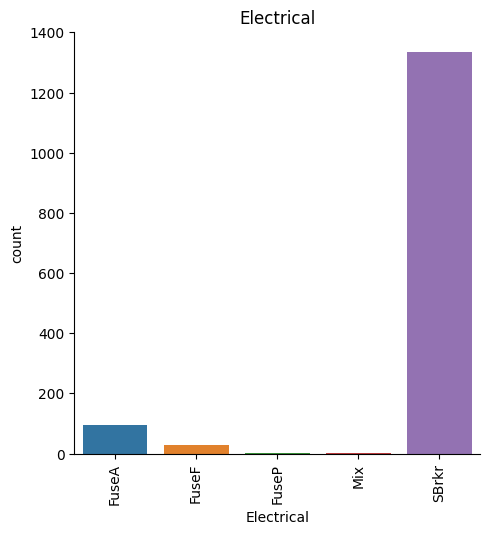

<Figure size 640x480 with 0 Axes>

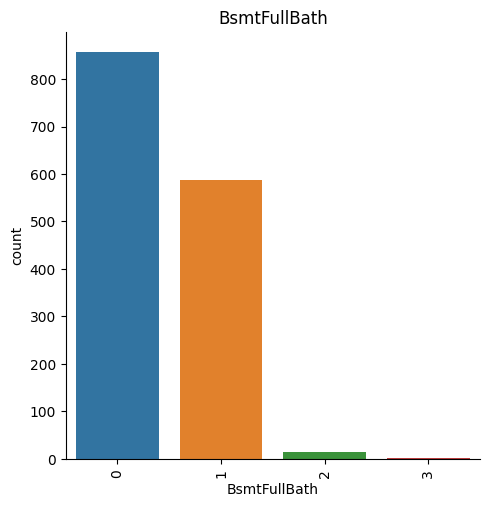

<Figure size 640x480 with 0 Axes>

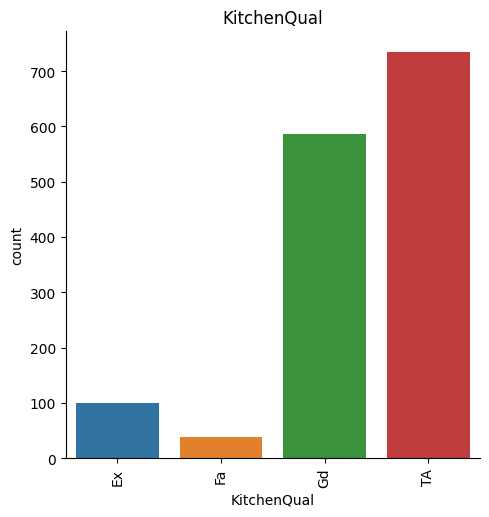

<Figure size 640x480 with 0 Axes>

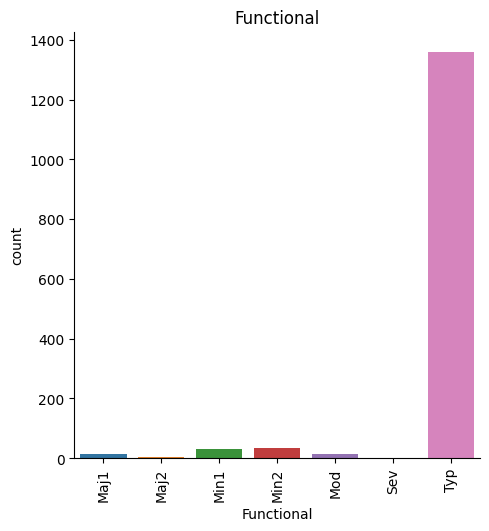

<Figure size 640x480 with 0 Axes>

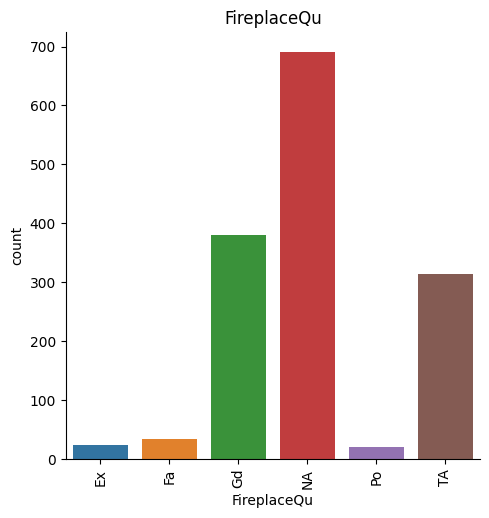

<Figure size 640x480 with 0 Axes>

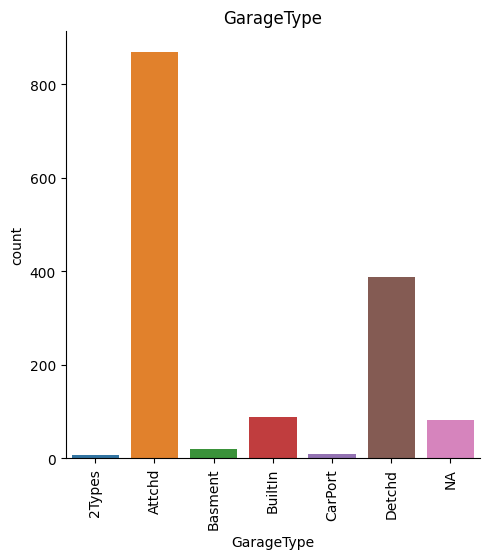

<Figure size 640x480 with 0 Axes>

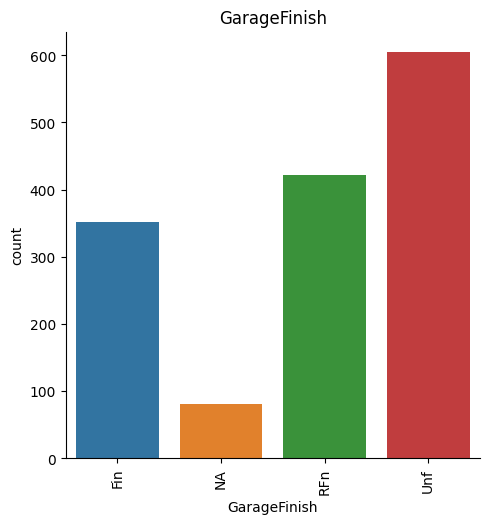

<Figure size 640x480 with 0 Axes>

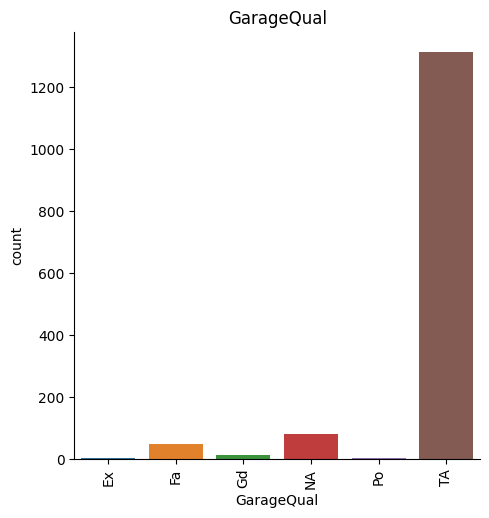

<Figure size 640x480 with 0 Axes>

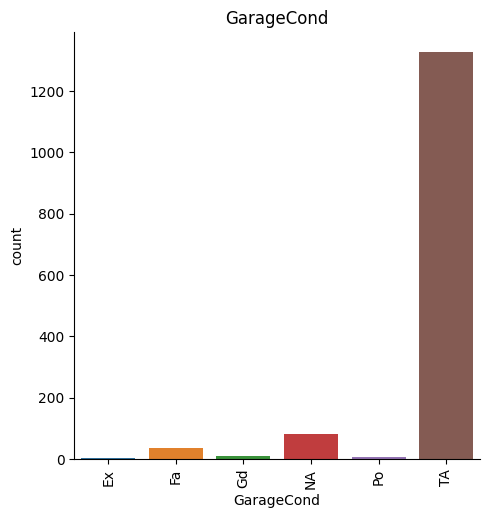

<Figure size 640x480 with 0 Axes>

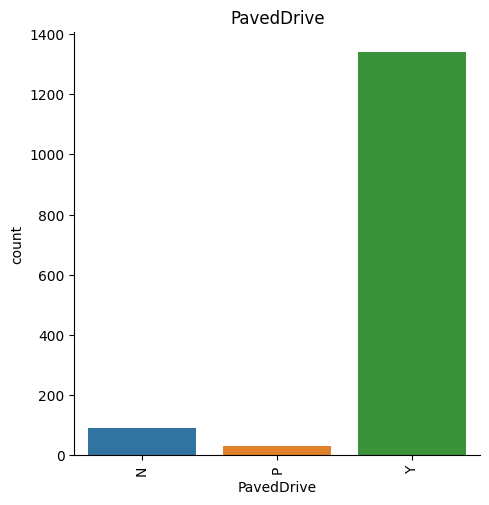

<Figure size 640x480 with 0 Axes>

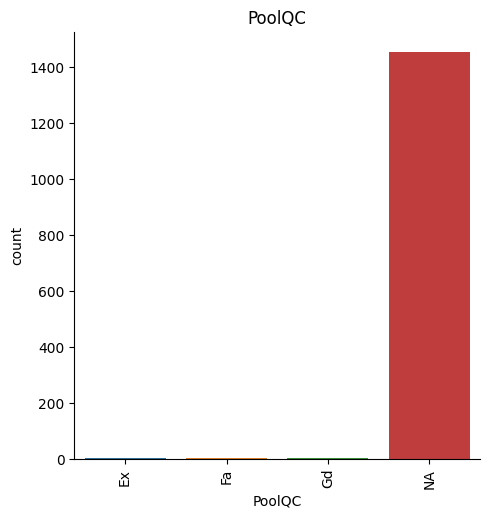

<Figure size 640x480 with 0 Axes>

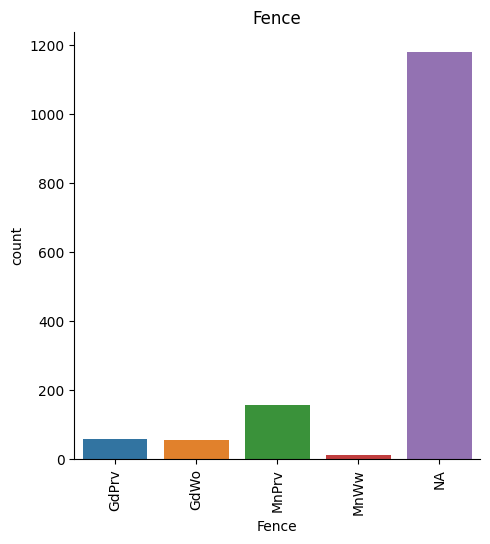

<Figure size 640x480 with 0 Axes>

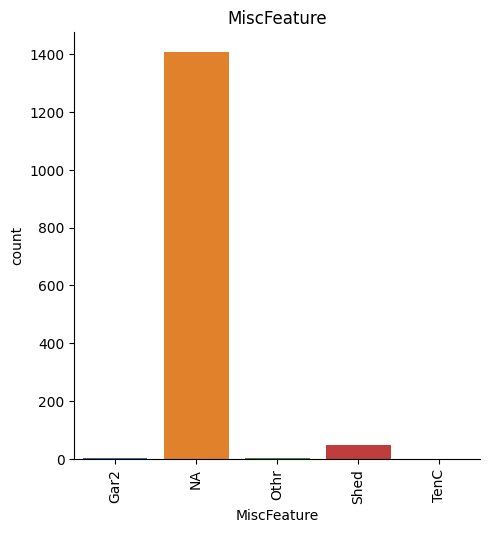

<Figure size 640x480 with 0 Axes>

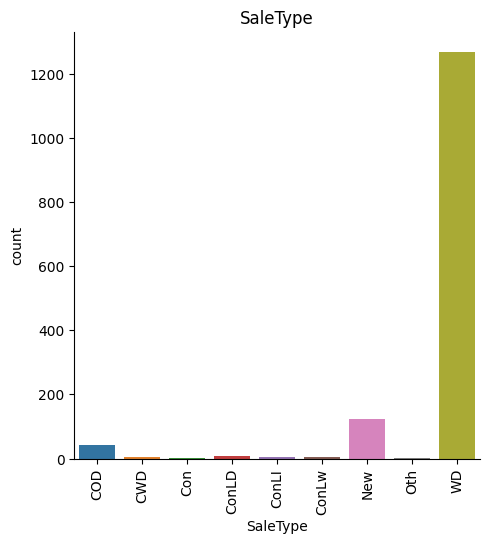

<Figure size 640x480 with 0 Axes>

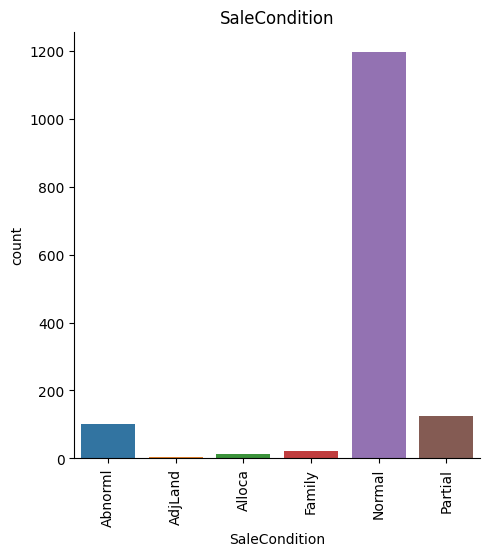

<Figure size 640x480 with 0 Axes>

In [12]:
for col in datanum:
    data.boxplot(column=[col])
    plt.savefig(col)
    plt.clf()
for col in datacat:
    if col in ['OverallQual','OverallCond']:
        sns.catplot(data=data, x=col, kind="count", order = ['0','1','2','3','4','5','6','7','8','9','10'])
        plt.xticks(rotation=90)
        plt.title(col)
        plt.savefig(col)
        plt.show()
        plt.clf()
    else:
        sns.catplot(data=data, x=col, kind="count", order = sorted(list(data[col].unique())))
        plt.xticks(rotation=90)
        plt.title(col)
        plt.savefig(col)
        plt.show()
        plt.clf()

array([[<AxesSubplot: title={'center': 'LotArea'}>,
        <AxesSubplot: title={'center': 'MasVnrArea'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF1'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF2'}>,
        <AxesSubplot: title={'center': 'BsmtUnfSF'}>],
       [<AxesSubplot: title={'center': 'TotalBsmtSF'}>,
        <AxesSubplot: title={'center': '1stFlrSF'}>,
        <AxesSubplot: title={'center': '2ndFlrSF'}>,
        <AxesSubplot: title={'center': 'LowQualFinSF'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>],
       [<AxesSubplot: title={'center': 'FullBath'}>,
        <AxesSubplot: title={'center': 'BedroomAbvGr'}>,
        <AxesSubplot: title={'center': 'KitchenAbvGr'}>,
        <AxesSubplot: title={'center': 'TotRmsAbvGrd'}>,
        <AxesSubplot: title={'center': 'Fireplaces'}>],
       [<AxesSubplot: title={'center': 'GarageCars'}>,
        <AxesSubplot: title={'center': 'GarageArea'}>,
        <AxesSubplot: title={'center': 'WoodDeckSF'}>,
        <

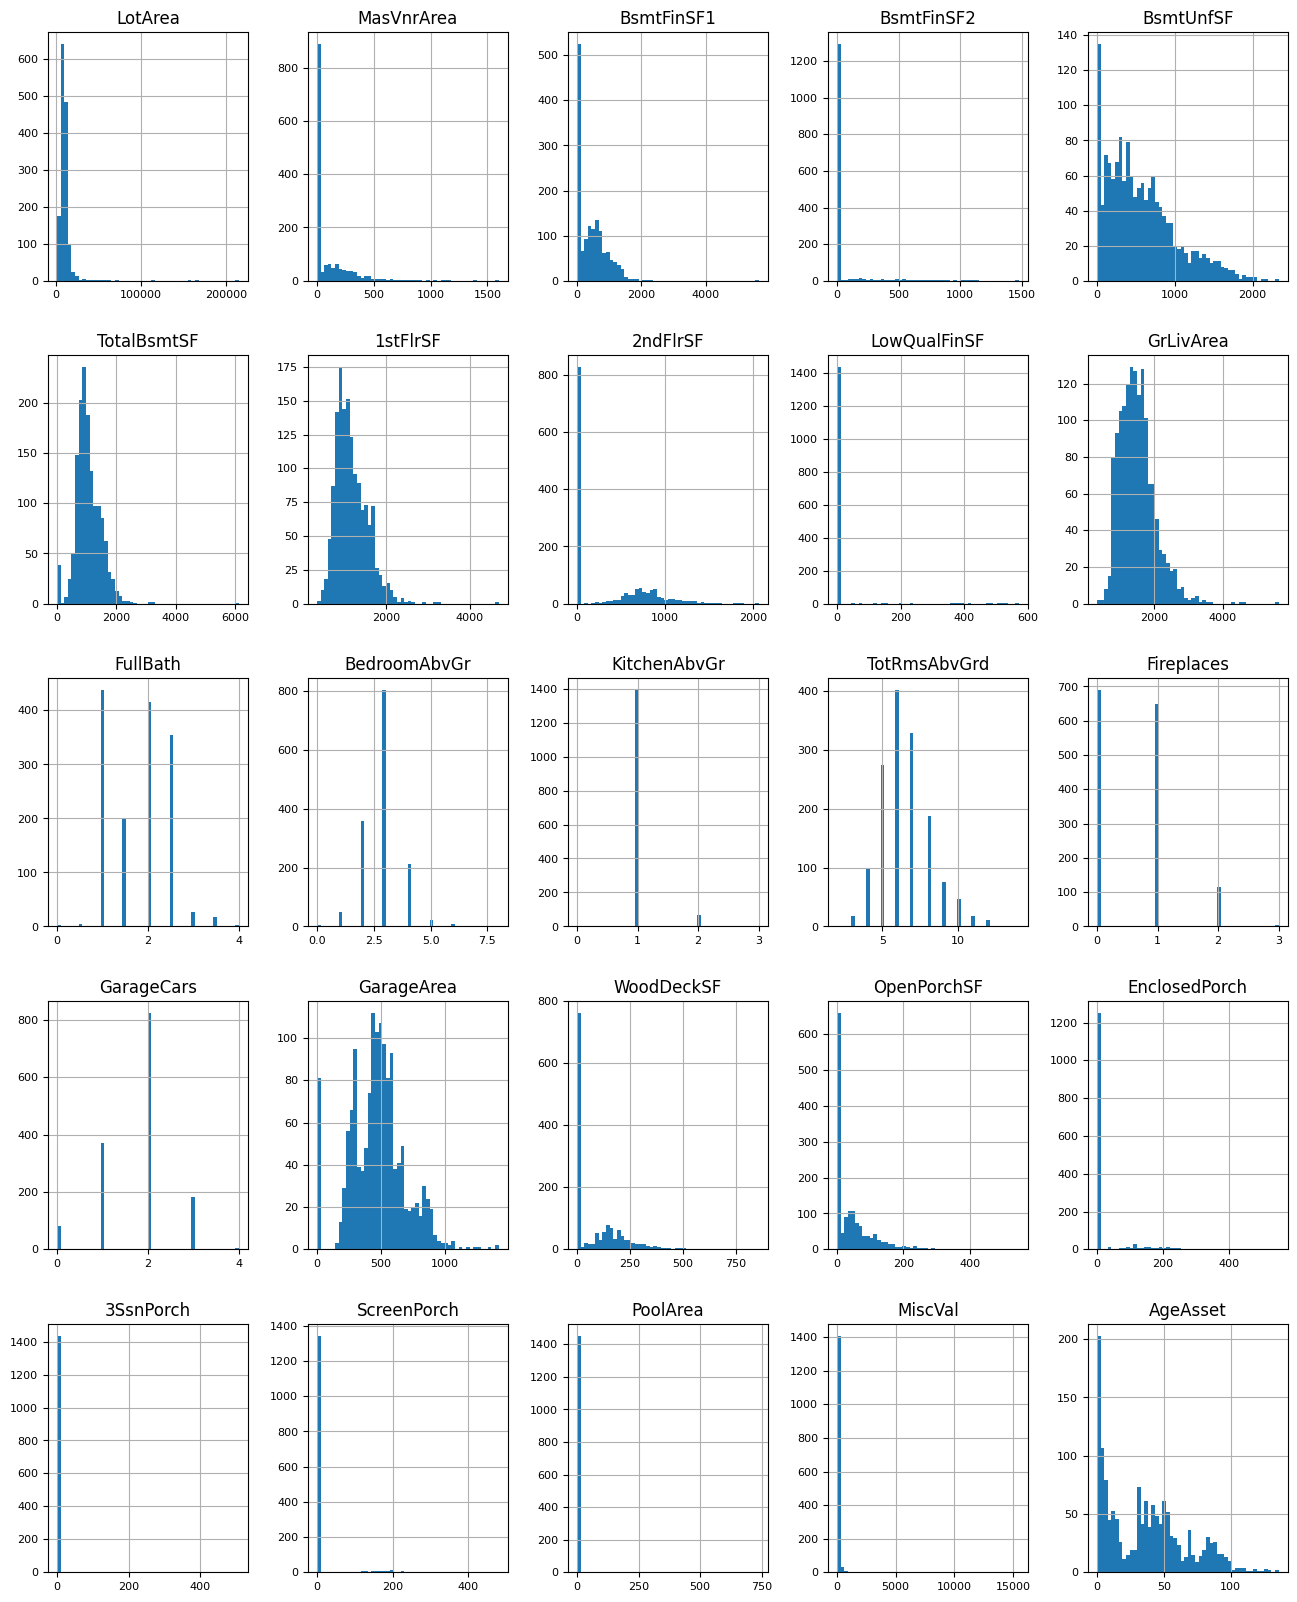

In [13]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## 2.3 - Testing for normallity in 4 Variables

As mentioned previously there are four variables visually like a normal distribution, on this section we will test if outliers or transformation will affect our result.
In figure 2 we can see the four Q-Q plots with log plus one transformation. We can see that with this transformation ‘GrLivArea’ and ‘1stFlrSF’ will now follow a normal distribution with a KS p-value of 0.19 and 0.24, respectively

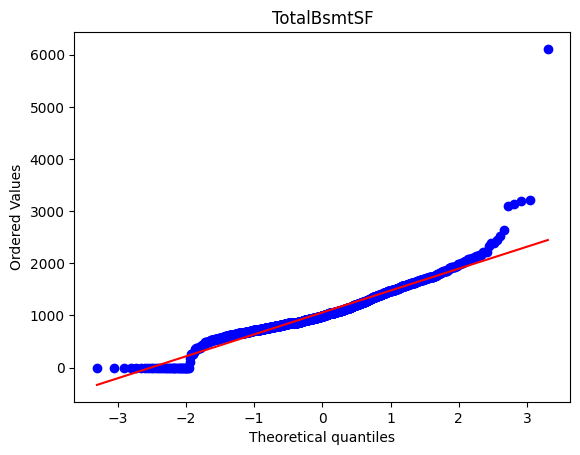

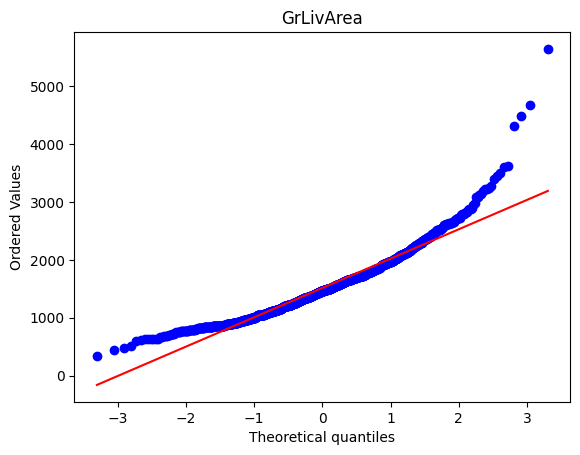

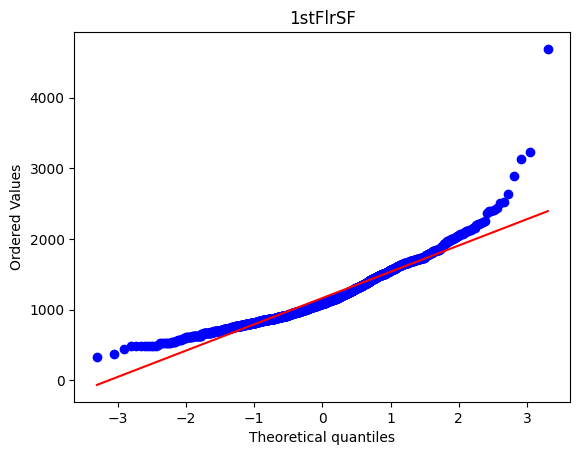

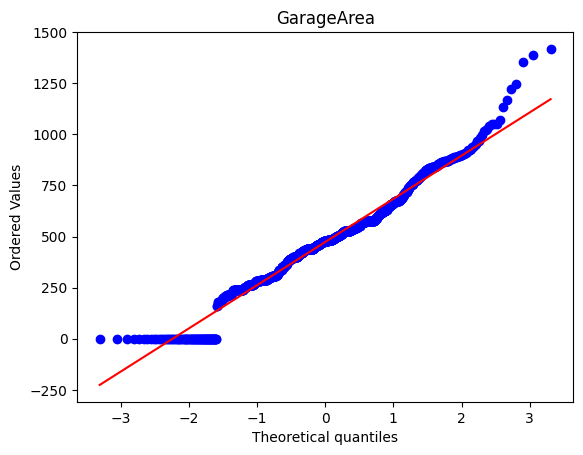

<Figure size 640x480 with 0 Axes>

In [14]:
for colt in ['TotalBsmtSF', 'GrLivArea', '1stFlrSF', 'GarageArea']:
        stats.probplot(data[colt],dist='norm',plot=plt)
        plt.title(colt)
        plt.show()
        plt.clf()

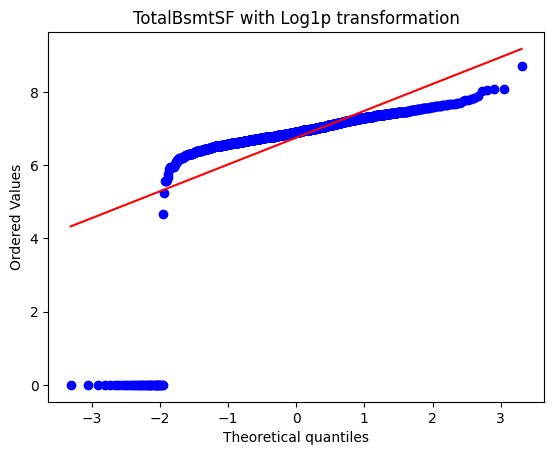

3.5562341396337555e-119


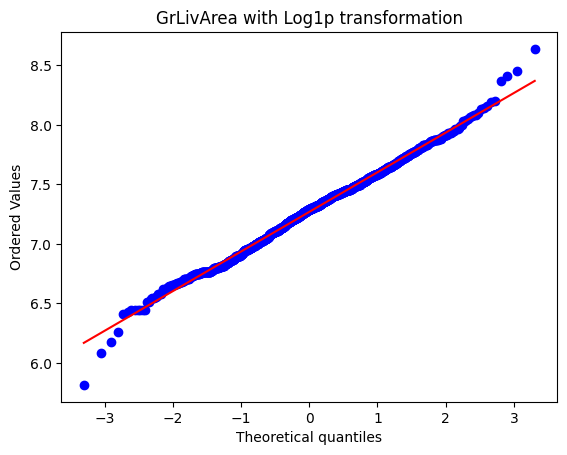

0.1897128473915588


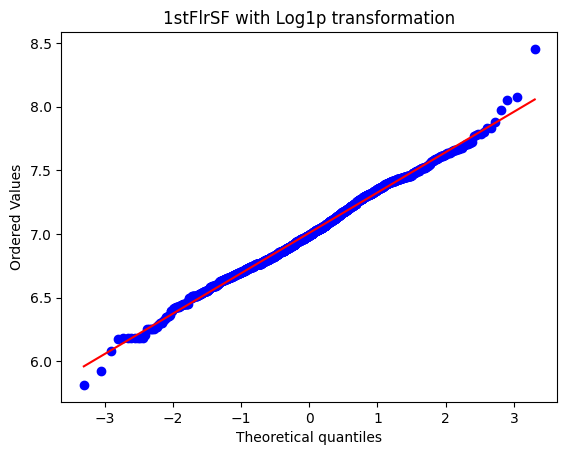

0.24372759266490507


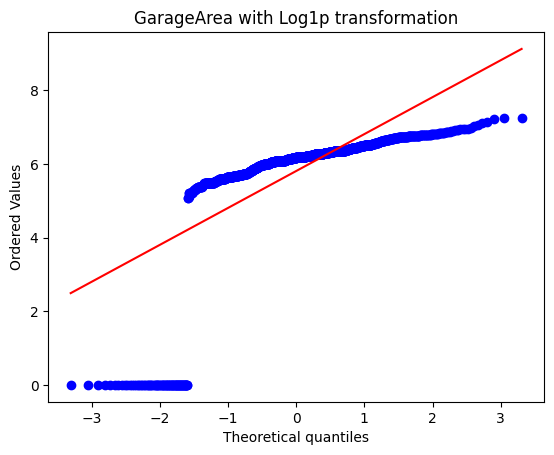

4.4156501403955856e-136


<Figure size 640x480 with 0 Axes>

In [15]:
for colt in ['TotalBsmtSF', 'GrLivArea', '1stFlrSF', 'GarageArea']:
    test = np.log1p(data[colt])
    stats.probplot(test,dist='norm',plot=plt)
    plt.title(colt +' with Log1p transformation')
    plt.show()
    plt.clf()
    print(stats.kstest(((test-test.mean())/test.std()),'norm')[1])

## 2.4 - Testing outliers

We also need to analyse the possibility of existence of outliers on each numerical variable. In figure 3, we can see the effect of removing the outliers from that variable to the main descriptive statistics. From this data we start to question if the first eight variables on the table should be included in our study, as the Variance of Coefficient would be zero without the outliers, also, the variable that would be mainly affected by this removal (69 observations) would be the ‘LotArea’, as the mean would get significantly closer to the trimmed mean.

In [16]:
stats_num_woO = pd.DataFrame()
new = pd.DataFrame()
for col in datanum:
    test = data[col][(data[col] <= np.quantile(data[col], 0.75) + (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5) & (data[col] >= np.quantile(data[col], 0.25) - (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5) ]
    
    new.loc[1,col] = stats.trim_mean(test, 0.1)
    new.loc[2,col] = test.mean()
    new.loc[6,col] = test.std() / test.mean()
    new.loc[7,col] = np.quantile(test, 0.75) + (np.quantile(test, 0.75)-np.quantile(test, 0.25)) * 1.5
    new.loc[8,col] = np.quantile(test, 0.25) - (np.quantile(test, 0.75)-np.quantile(test, 0.25)) * 1.5
    new.loc[9,col] = len(test[(test > np.quantile(test, 0.75) + (np.quantile(test, 0.75)-np.quantile(data[col], 0.25)) * 1.5) |      (test < np.quantile(test, 0.25) - (np.quantile(test, 0.75)-np.quantile(test, 0.25)) * 1.5) ])
stats_num_woO = stats_num_woO.append(new)
stats_num_woO = stats_num_woO.rename(index={1:'trimmed mean', 2:'Mean',3:'kurtosis',4:'ks p-value',5:'sw p-value',6:'Var Coef',7:'UL',8:'LL',9:'# Outliers'})
stats_num_woO = stats_num_woO.round(3)
stats_num_woO.to_excel('stats_woO.xlsx')
stats_num_woO

LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
trimmed mean   9310.946      43.798     382.261         0.0    503.110   
Mean           9272.537      66.294     433.539         0.0    541.045   
Var Coef          0.345       1.603       0.978         NaN      0.749   
UL            16935.250     290.000    1762.500         0.0   1636.500   
LL             1725.250    -174.000   -1057.500         0.0   -635.500   
# Outliers       29.000      87.000       1.000         0.0     10.000   

              TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  \
trimmed mean     1038.490  1120.976   284.547           0.0   1450.224  ...   
Mean             1059.736  1143.156   344.768           0.0   1476.752  ...   
Var Coef            0.328     0.302     1.255           NaN      0.305  ...   
UL               1997.250  2110.375  1820.000           0.0   2677.500  ...   
LL                 91.250   141.375 -1092.000           0.0    193.500  ...   
# Outliers          4.000     6.000     0.000           0.0      7.000  ...   

              GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
trimmed mean       1.769     464.892      67.147       27.704            0.0   
Mean               1.759     463.847      84.452       35.510            0.0   
Var Coef           0.419       0.433       1.267        1.245            NaN   
UL                 3.500     951.750     410.625      150.000            0.0   
LL                -0.500     -50.250    -246.375      -90.000            0.0   
# Outliers         0.000       0.000       3.000       31.000            0.0   

              3SsnPorch  ScreenPorch  PoolArea  MiscVal  AgeAsset  
trimmed mean        0.0          0.0       0.0      0.0    33.388  
Mean                0.0          0.0       0.0      0.0    36.038  
Var Coef            NaN          NaN       NaN      NaN     0.820  
UL                  0.0          0.0       0.0      0.0   124.500  
LL                  0.0          0.0       0.0      0.0   -63.500  
# Outliers          0.0          0.0       0.0      0.0     0.000  

[6 rows x 25 columns]

## 2.5 - Target Variable

In [17]:
stats_tar = target.describe()
stats_tar.loc[1] = stats.trim_mean(target, 0.1)
stats_tar.loc[2] = target.skew()
stats_tar.loc[3] = target.kurtosis()
stats_tar.loc[4] = stats.kstest(((target-target.mean())/target.std()),'norm')[1]
stats_tar.loc[6] = target.std() / target.mean()
stats_tar.loc[7] = np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5
stats_tar.loc[8] = np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5
stats_tar.loc[9] = len(target[(target > np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) |      (target < np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) ])
stats_tar = stats_tar.rename(index={1:'trimmed mean', 2:'skew',3:'kurtosis',4:'ks p-value',5:'sw p-value',6:'Var Coef',7:'UL',8:'LL',9:'# Outliers'})
stats_tar = stats_tar.round(3)
stats_tar.to_excel('target.xlsx')
stats_tar

count             1460.000
mean            180921.196
std              79442.503
min              34900.000
25%             129975.000
50%             163000.000
75%             214000.000
max             755000.000
trimmed mean    170783.291
skew                 1.883
kurtosis             6.536
ks p-value           0.000
Var Coef             0.439
UL              340037.500
LL                3937.500
# Outliers          61.000
Name: SalePrice, dtype: float64

<AxesSubplot: >

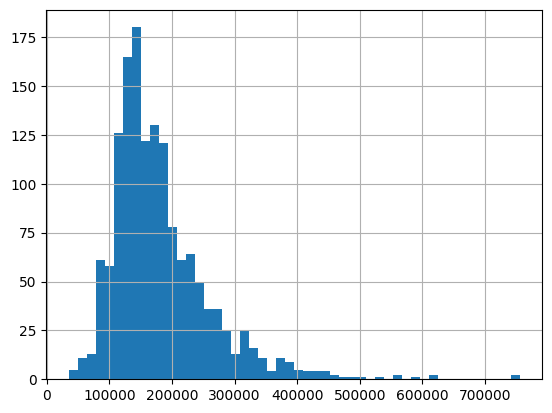

In [18]:
target.hist(bins=50)

In [19]:
stats_tar = target[(target <= np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) & (target >= np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) ].describe()
stats_tar.loc[1] = stats.trim_mean(target, 0.1)
stats_tar.loc[2] = target.skew()
stats_tar.loc[3] = target.kurtosis()
stats_tar.loc[4] = stats.kstest(((target-target.mean())/target.std()),'norm')[1]
stats_tar.loc[6] = target.std() / target.mean()
stats_tar.loc[7] = np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5
stats_tar.loc[8] = np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5
stats_tar.loc[9] = len(target[(target > np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) |      (target < np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) ])
stats_tar = stats_tar.rename(index={1:'trimmed mean', 2:'skew',3:'kurtosis',4:'ks p-value',5:'sw p-value',6:'Var Coef',7:'UL',8:'LL',9:'# Outliers'})
stats_tar = stats_tar.round(3)
stats_tar.to_excel('target_woO.xlsx')
stats_tar

count             1399.000
mean            170237.127
std              59230.131
min              34900.000
25%             129000.000
50%             159500.000
75%             203500.000
max             340000.000
trimmed mean    170783.291
skew                 1.883
kurtosis             6.536
ks p-value           0.000
Var Coef             0.439
UL              340037.500
LL                3937.500
# Outliers          61.000
Name: SalePrice, dtype: float64

<AxesSubplot: >

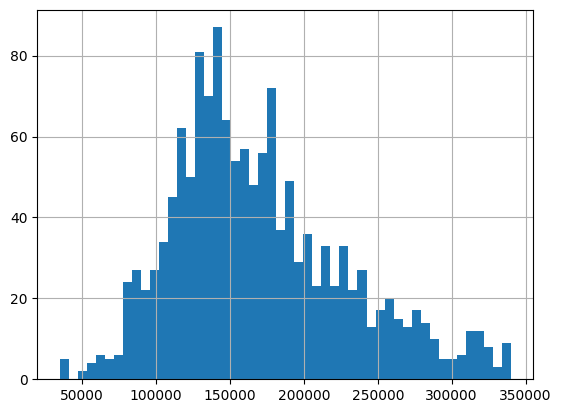

In [20]:
target[(target <= np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) & (target >= np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) ].hist(bins=50)

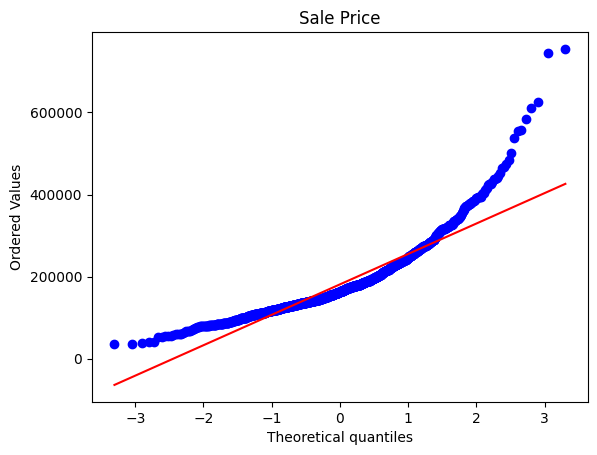

6.330230702928437e-20


<Figure size 640x480 with 0 Axes>

In [21]:
stats.probplot(target,dist='norm',plot=plt)
plt.title('Sale Price')
plt.show()
plt.clf()
print(stats.kstest(((target-target.mean())/target.std()),'norm')[1])

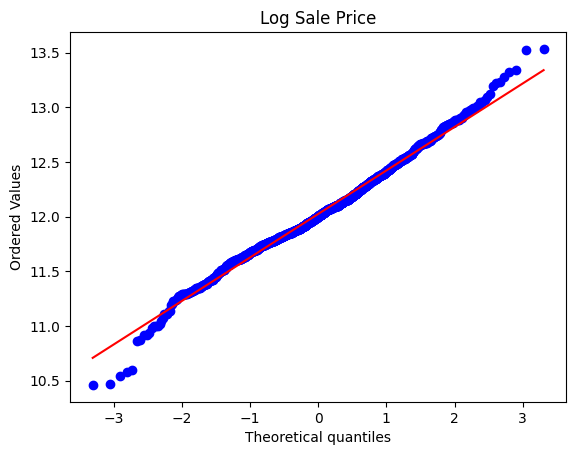

0.014665968087434231


<Figure size 640x480 with 0 Axes>

In [22]:
stats.probplot(np.log(target),dist='norm',plot=plt)
plt.title('Log Sale Price')
plt.show()
plt.clf()
print(stats.kstest(((np.log(target)-np.log(target).mean())/np.log(target).std()),'norm')[1])

Text(0.5, 1.0, 'Log of Sale Price')

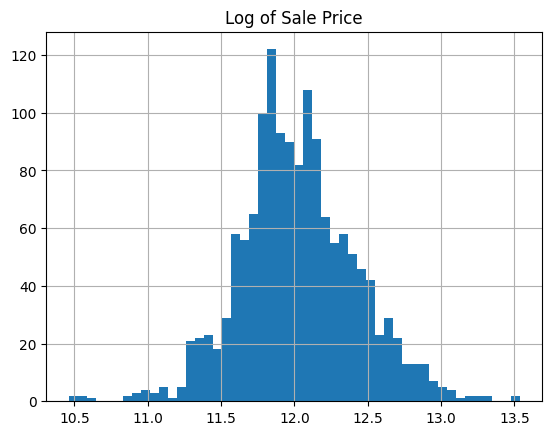

In [23]:
np.log(target).hist(bins=50)
plt.title('Log of Sale Price')

## 2.6 - Conclusions

From this analysis we will make changes to our main data set, we will transform ‘GrLivArea’ and ‘1stFlrSF’ using a log plus one transformation, and ‘SalePrice’ with a log transformation in order to assume normality.
Regarding outliers, at this point we will not remove any as we will need to study further the possible outliers within ‘LotArea’ and gather more evidence if we need to remove them.


In [24]:
data['1stFlrSF'] = np.log1p(data['1stFlrSF'])
data['GrLivArea'] = np.log1p(data['GrLivArea'])

target = np.log(target)

# 3 - Bivariate Analysis


## 3.1 - Numerical versus Sale Price

As most of the numerical variables do not follow a normal distribution, we will use Spearman’s correlation for our analysis. In figure 8, we can see the correlation matrix.

<AxesSubplot: >

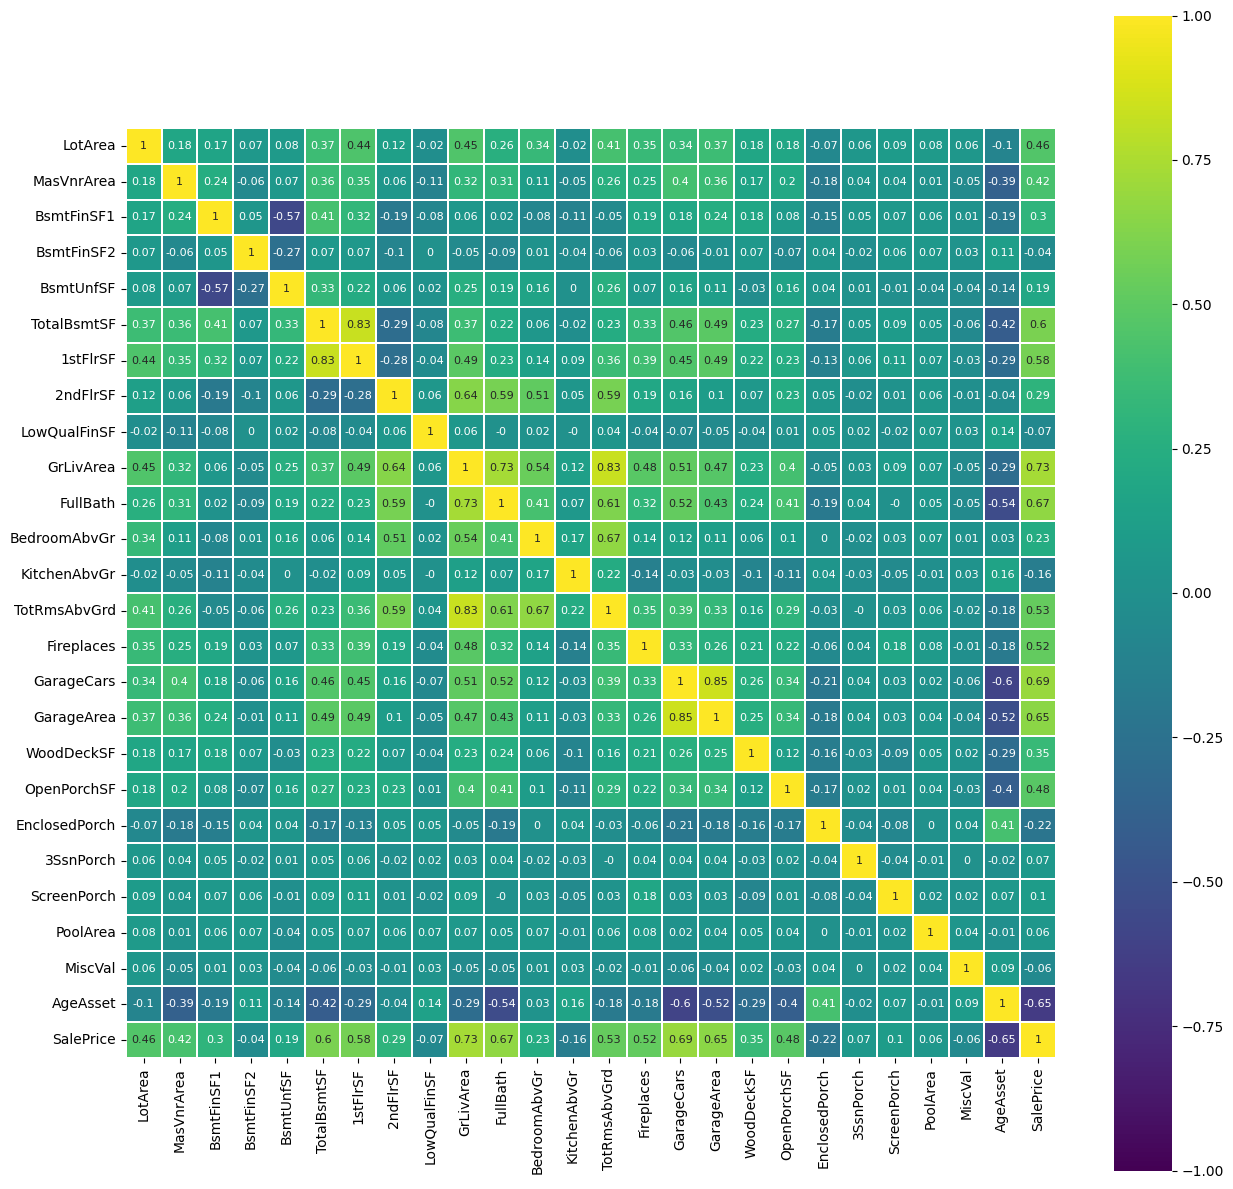

In [25]:
plt.figure(figsize=(15, 15))
sns.heatmap(data= pd.concat([data,target], axis=1).corr('spearman').round(2),
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

The variables with the most correlation towards Sale Price are shown in Figure 9. We can see that the most correlated feature is the Area of the house, followed by the number of Cars that can fit in the garage, quite common in urban areas; and, as expected, the age of the house has the highest negative correlation as the older the house the lower the price it will be expected to be sold.

In [26]:
pd.concat([data,target], axis=1).corr('spearman').round(2)['SalePrice'].sort_values()

AgeAsset        -0.65
EnclosedPorch   -0.22
KitchenAbvGr    -0.16
LowQualFinSF    -0.07
MiscVal         -0.06
BsmtFinSF2      -0.04
PoolArea         0.06
3SsnPorch        0.07
ScreenPorch      0.10
BsmtUnfSF        0.19
BedroomAbvGr     0.23
2ndFlrSF         0.29
BsmtFinSF1       0.30
WoodDeckSF       0.35
MasVnrArea       0.42
LotArea          0.46
OpenPorchSF      0.48
Fireplaces       0.52
TotRmsAbvGrd     0.53
1stFlrSF         0.58
TotalBsmtSF      0.60
GarageArea       0.65
FullBath         0.67
GarageCars       0.69
GrLivArea        0.73
SalePrice        1.00
Name: SalePrice, dtype: float64

By performing an analysis on the scatter plots of the main correlated numerical variables against the Sale Price (figure 11 will be updated) we can identify one major outlier (id. 1299) where the ‘TotalBsmtSF’ is above 6100, ‘1stFlrSF’ is above 8.4, ‘GrLivArea’ is above 8.63, and ‘GarageArea’ is above 1200. We could consider other data points as an outlier: id. 1191 with the ‘GarageArea’ above 1200 and log Sale Price above 12; or ids. 305, 748 and 1417, where they have ‘AgeAsset’ longer than 110 years, but log of Sale price is high (above 12.4).

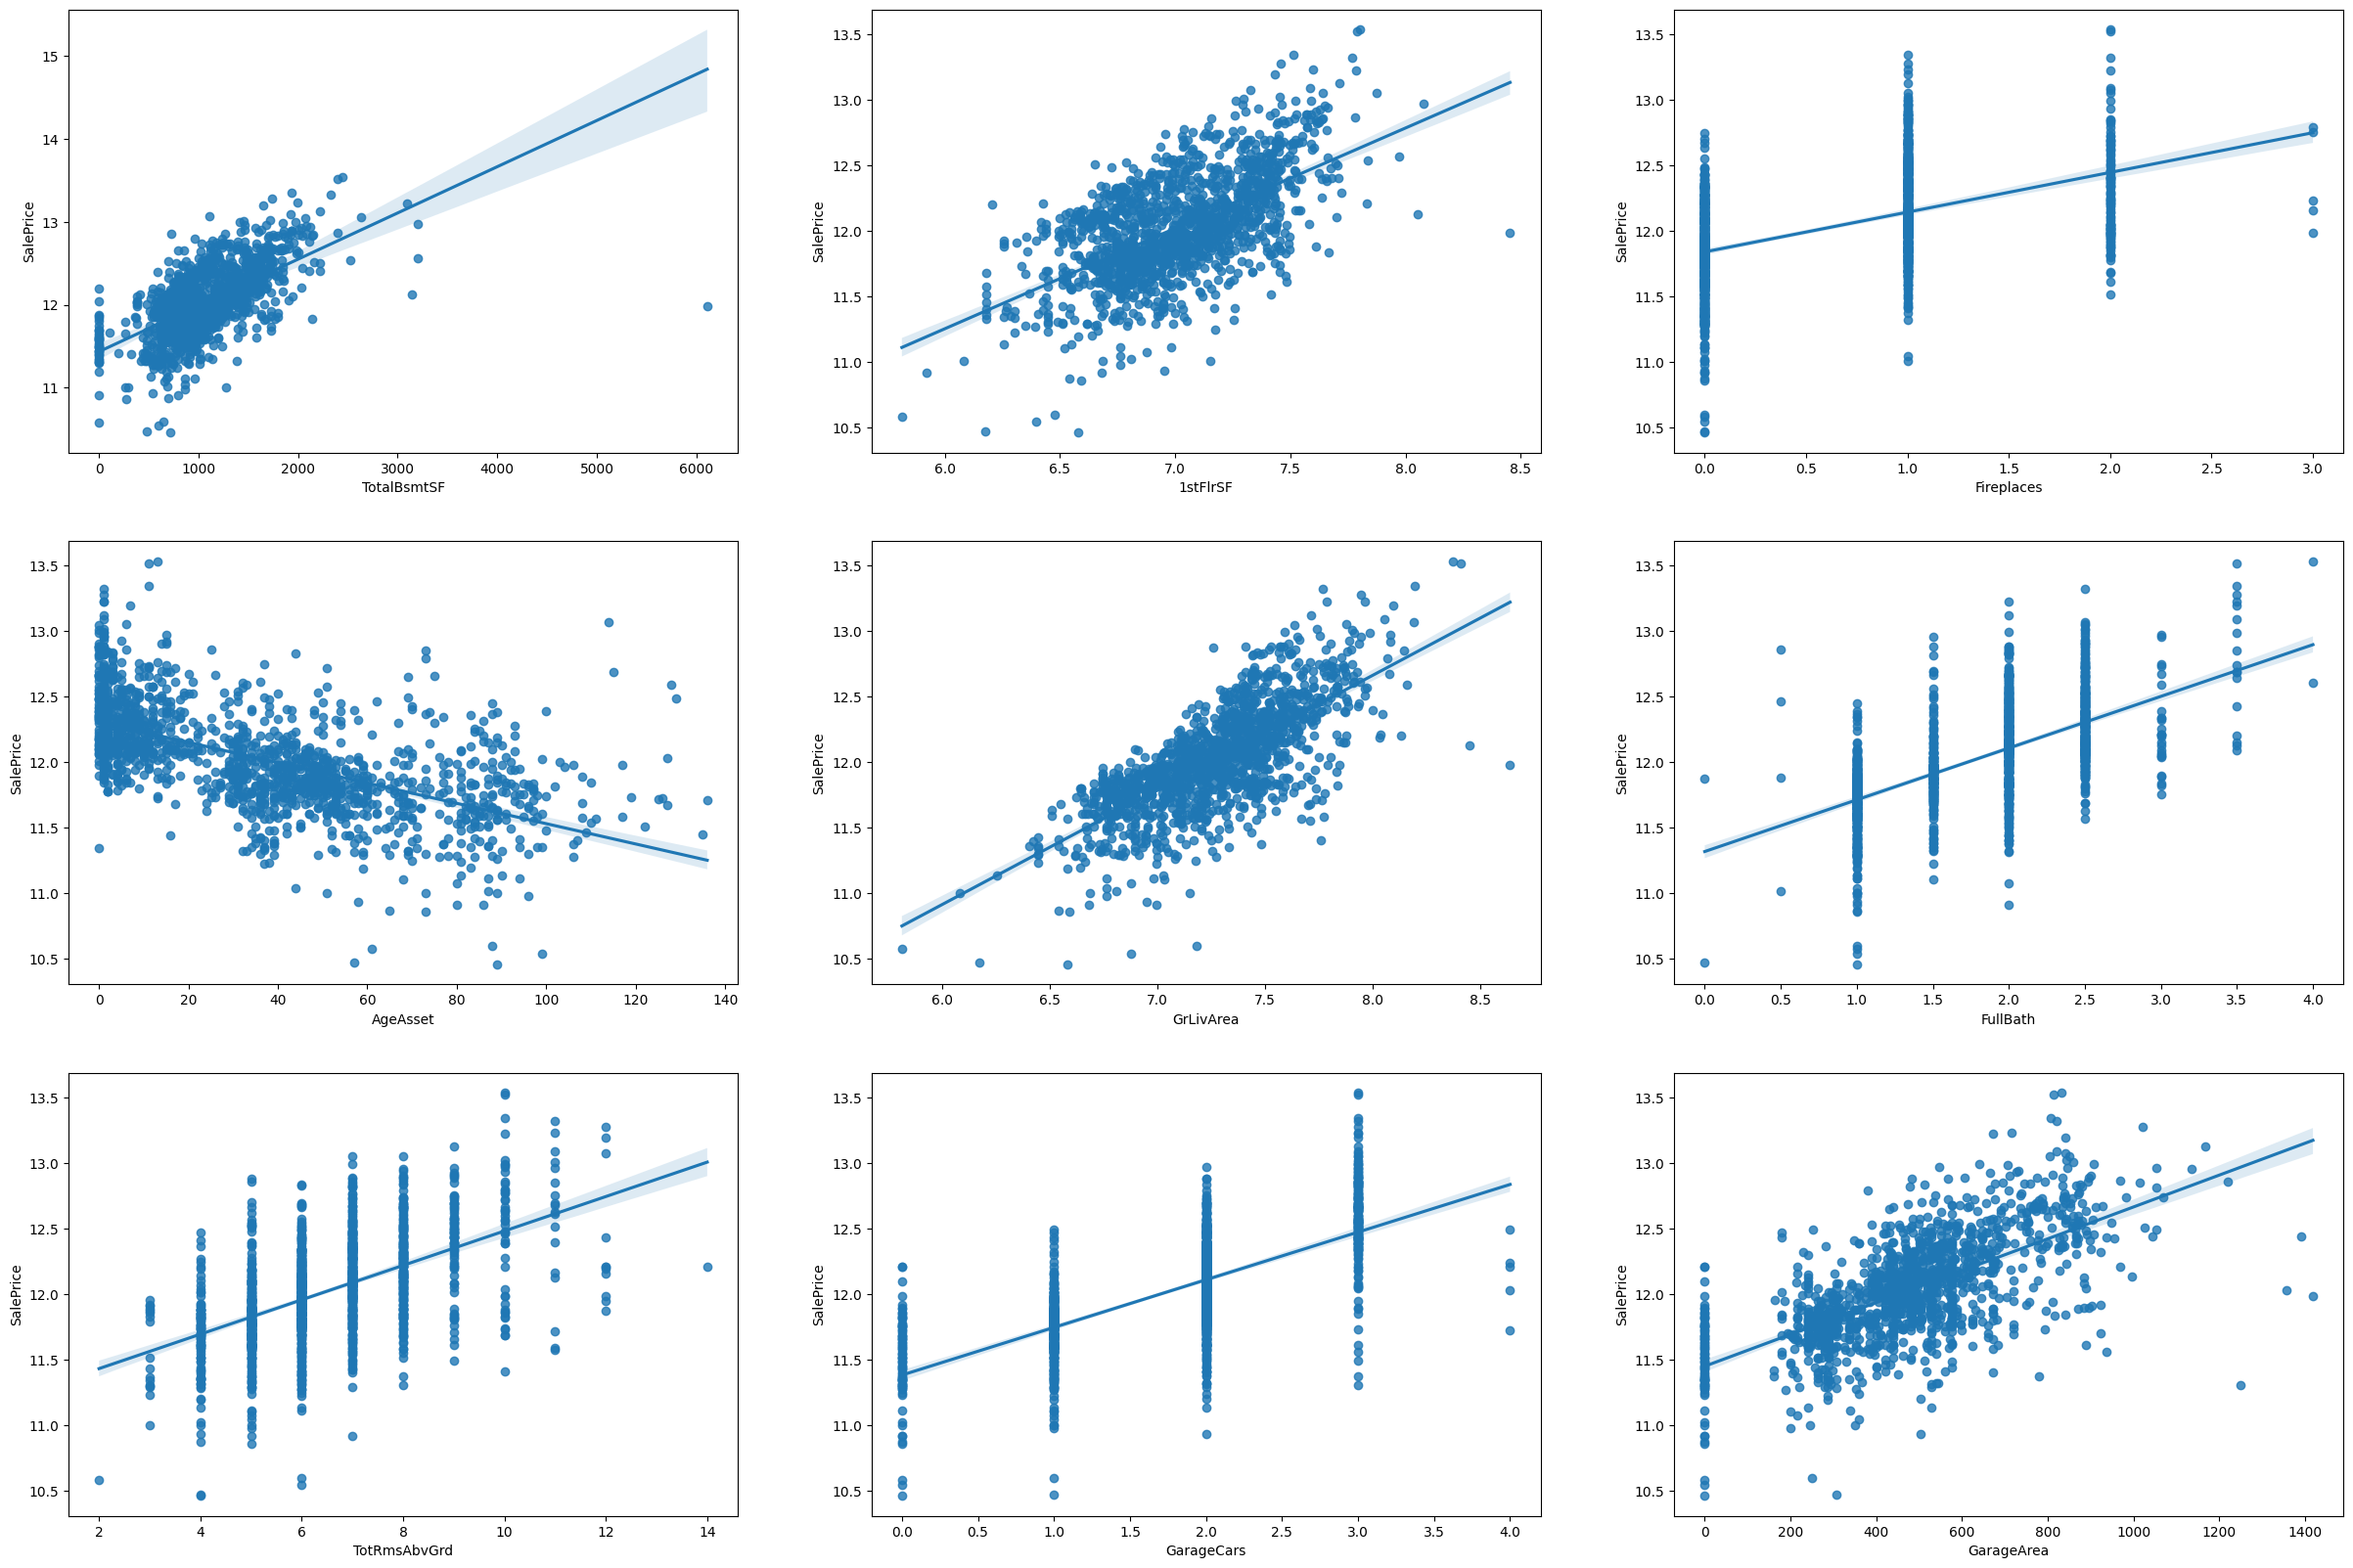

In [27]:
features_to_analyse = ['TotalBsmtSF', '1stFlrSF', 'Fireplaces',
                       'AgeAsset', 'GrLivArea', 'FullBath',
                       'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
                       'SalePrice']
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (30, 20))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=pd.concat([data,target], axis=1)[features_to_analyse], ax=ax)

In [28]:
data[data['TotalBsmtSF']>5000]['TotalBsmtSF']

Id
1299    6110.0
Name: TotalBsmtSF, dtype: float64

In [29]:
data[data['1stFlrSF']>=8.4]['1stFlrSF'] 

Id
1299    8.453827
Name: 1stFlrSF, dtype: float64

In [30]:
data[data['GrLivArea']>=8.6]['GrLivArea'] 

Id
1299    8.638171
Name: GrLivArea, dtype: float64

In [31]:
for i in data[(data['GarageArea']>=1200)]['GarageArea'].index:
    print(str(i) +" "+ str(target.iloc[i]))

582 11.682668239557323
826 11.603679828238693
1062 11.407564949312402
1191 12.066810578196666
1299 11.944707881395766


In [32]:
for i in data[(data['AgeAsset']>=110)]['AgeAsset'].index:
    if target.iloc[i] > 12.4:
        print(str(i) +" "+ str(target.iloc[i]))

305 12.631013530138995
748 12.46997418931655
1417 12.736700896592344


As it was identified in the univariate analysis, we should also consider looking at ‘LotArea’ for possible outliers. The datapoints with id. 250, 314, 336 and 707 they have more than 100.000 squared feet of Lot Area but its sale price as high value.

<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

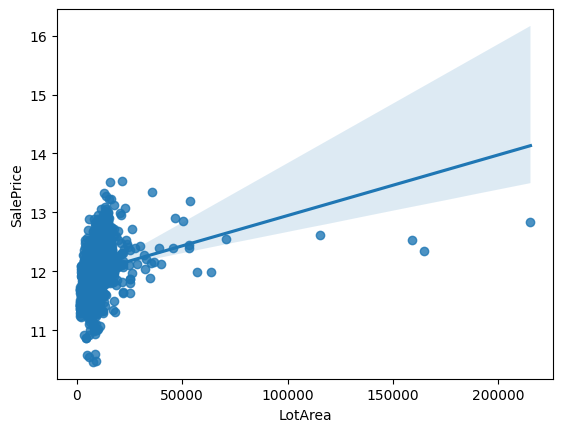

In [33]:
sns.regplot(x='LotArea',y='SalePrice', data=pd.concat([data,target], axis=1))

In [34]:
data[data['LotArea']>=100000]['LotArea'] 

Id
250    159000.0
314    215245.0
336    164660.0
707    115149.0
Name: LotArea, dtype: float64

## 3.2 - Categorical versus Sale Price

The relationship between sale price and the ordinal categorical are as expected, as quality increases so it seams to be happening with the sale price.
 

As for the remaining we will have some variables that visually can be easier to identify to affect sale price (e.g., ‘SaleType’) but other that could be dubious (e.g., ‘LotConfig’).

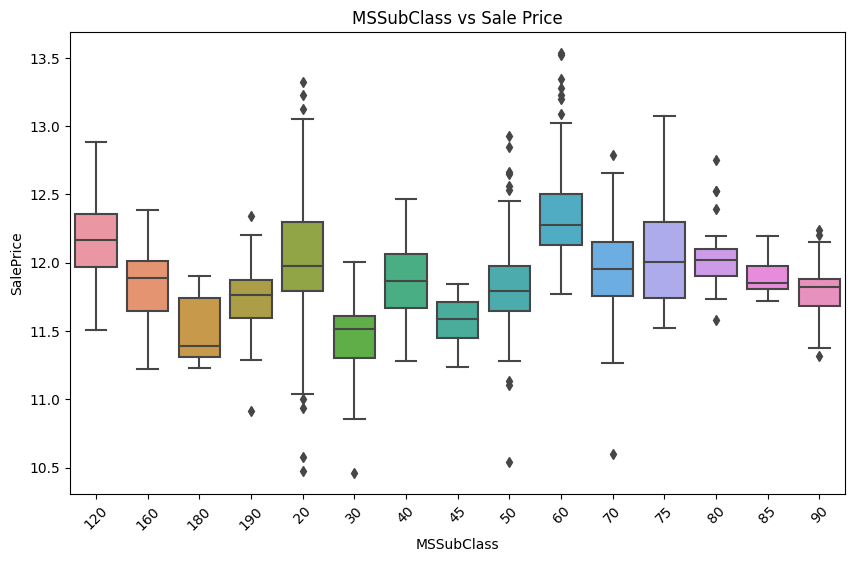

<Figure size 640x480 with 0 Axes>

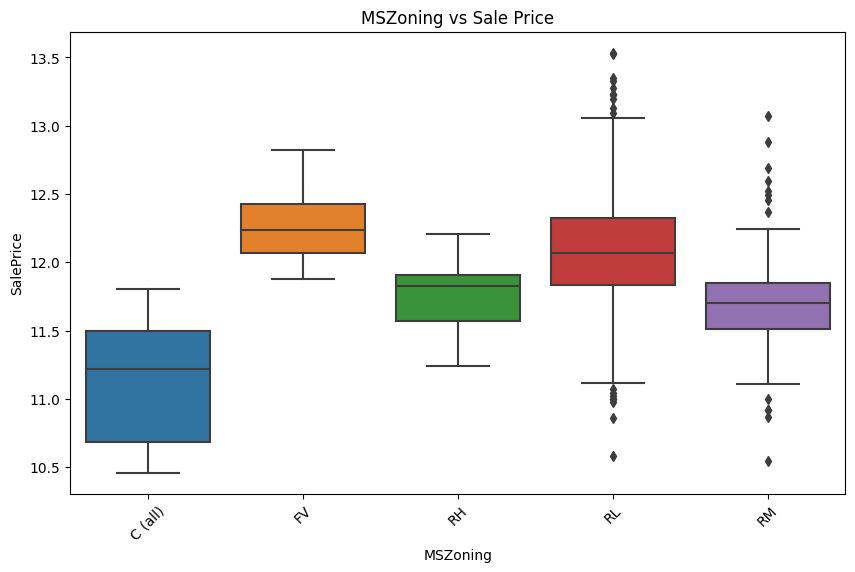

<Figure size 640x480 with 0 Axes>

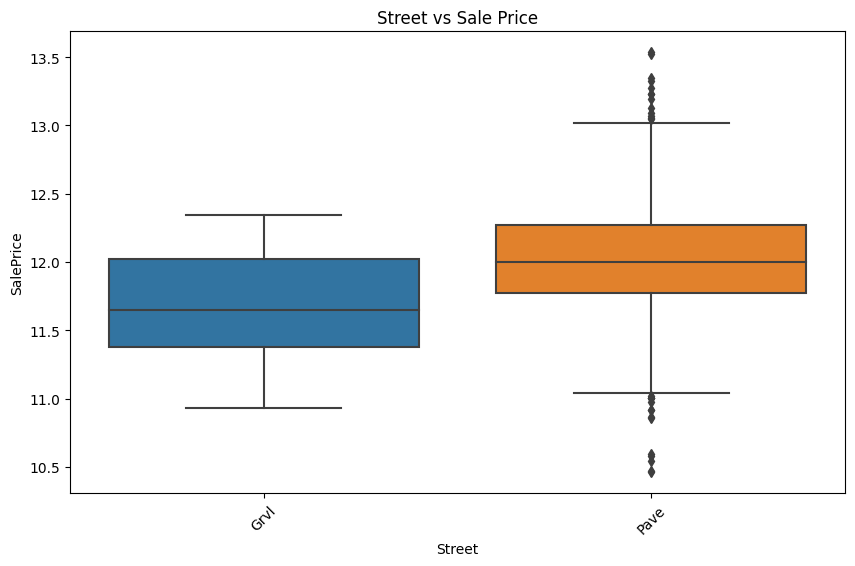

<Figure size 640x480 with 0 Axes>

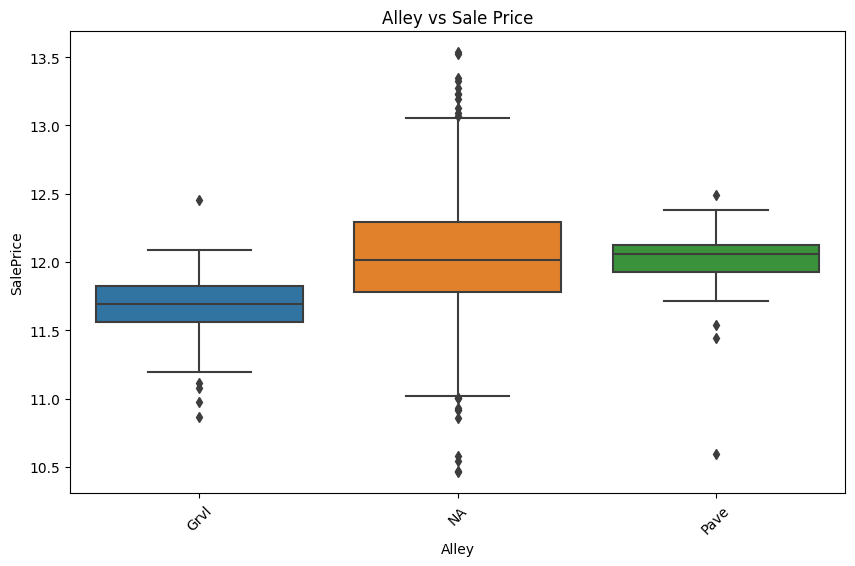

<Figure size 640x480 with 0 Axes>

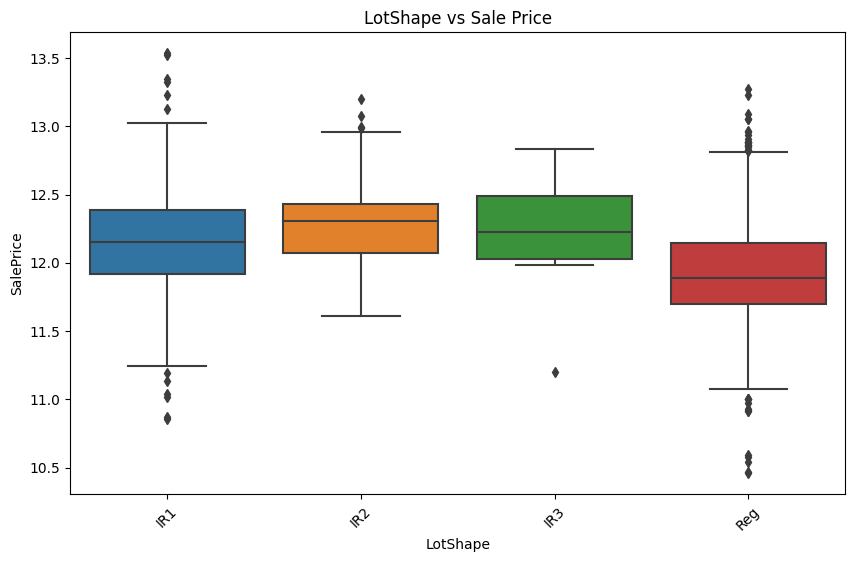

<Figure size 640x480 with 0 Axes>

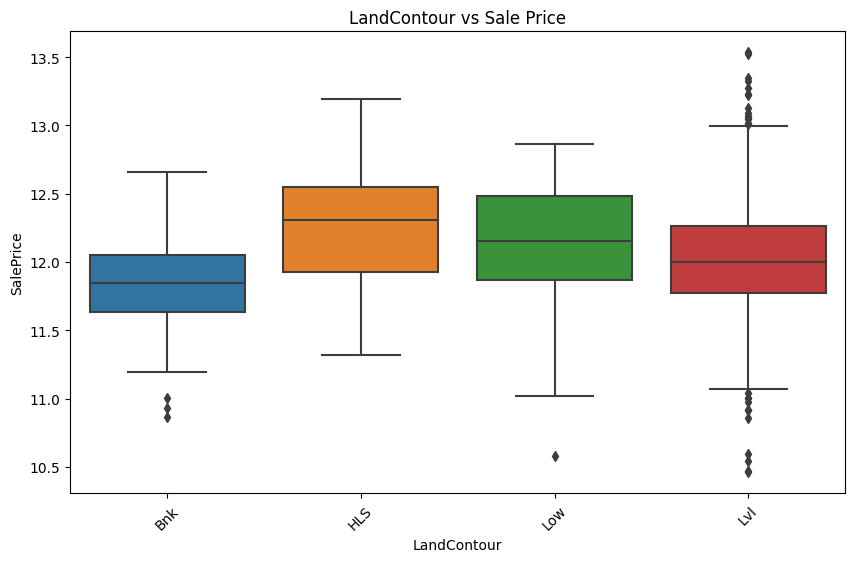

<Figure size 640x480 with 0 Axes>

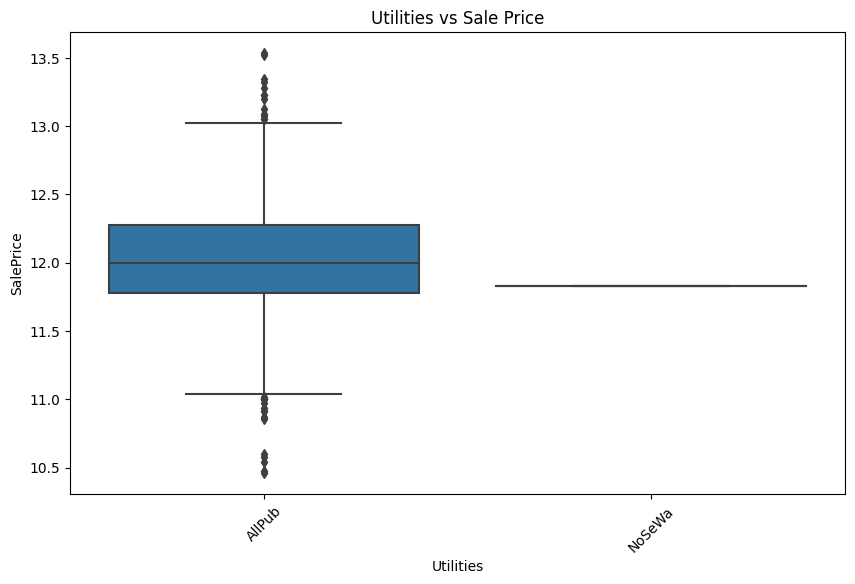

<Figure size 640x480 with 0 Axes>

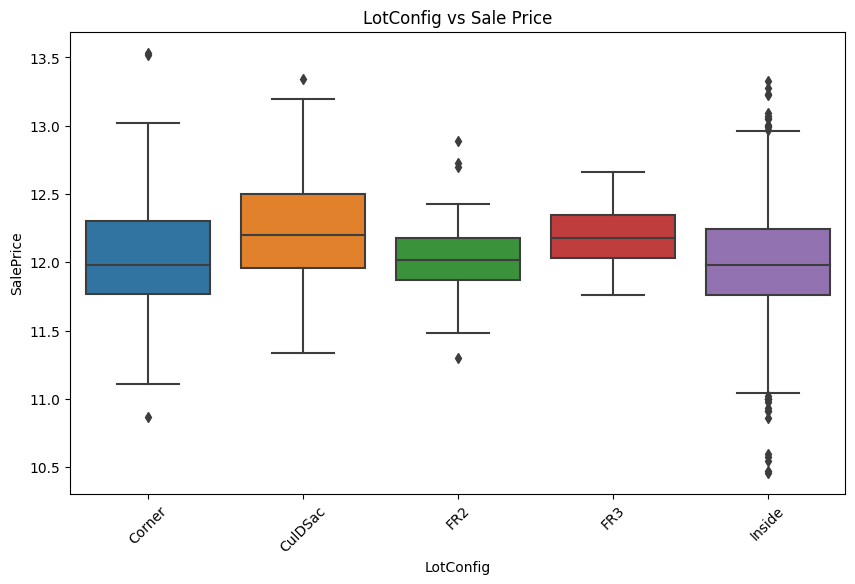

<Figure size 640x480 with 0 Axes>

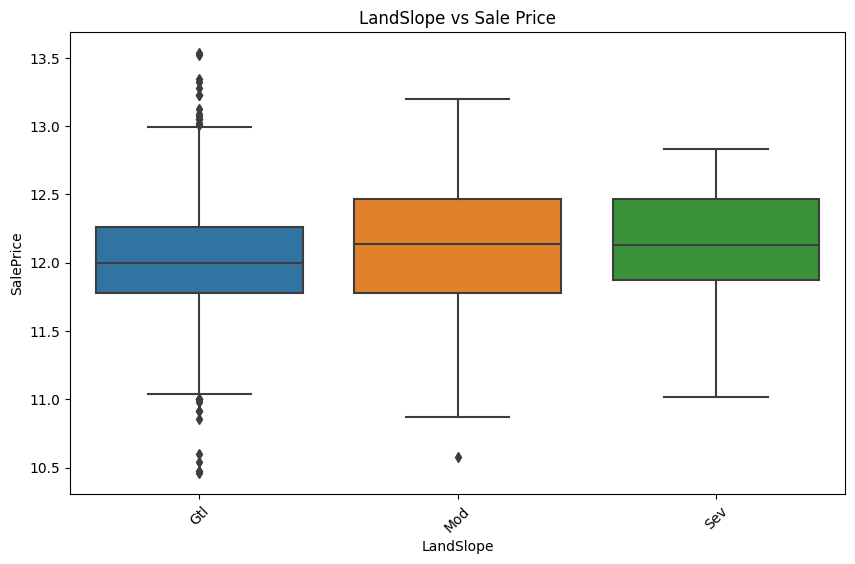

<Figure size 640x480 with 0 Axes>

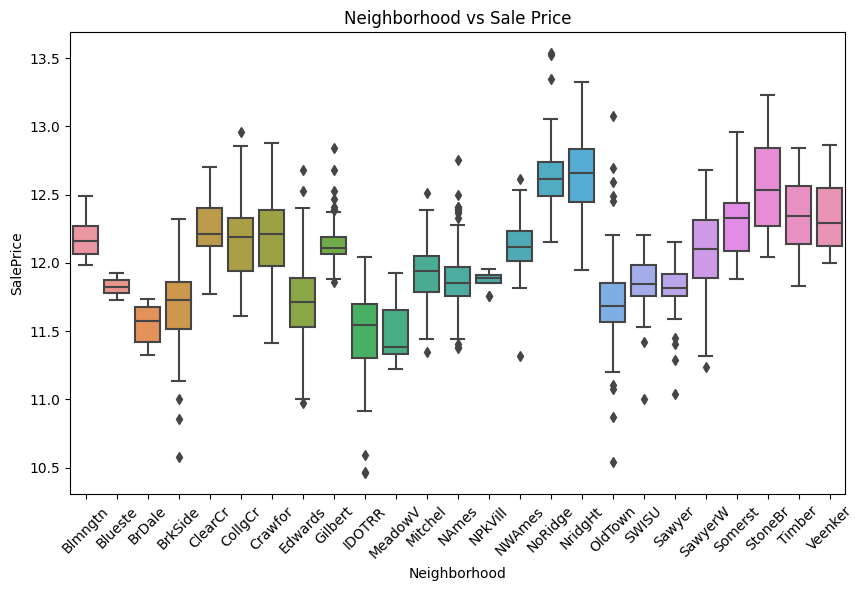

<Figure size 640x480 with 0 Axes>

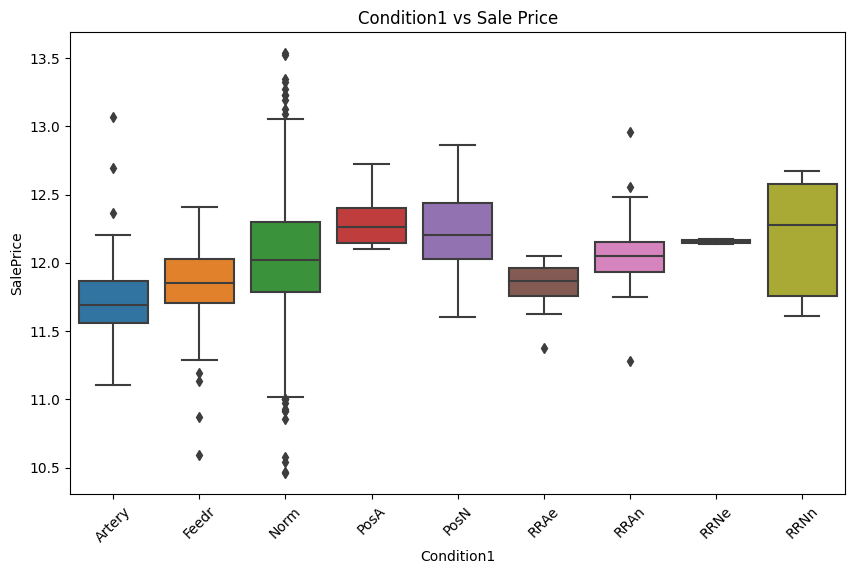

<Figure size 640x480 with 0 Axes>

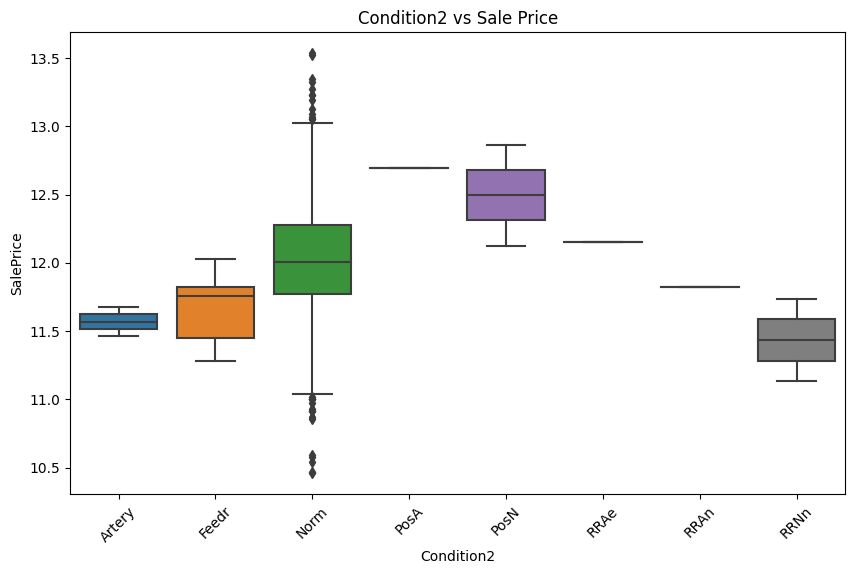

<Figure size 640x480 with 0 Axes>

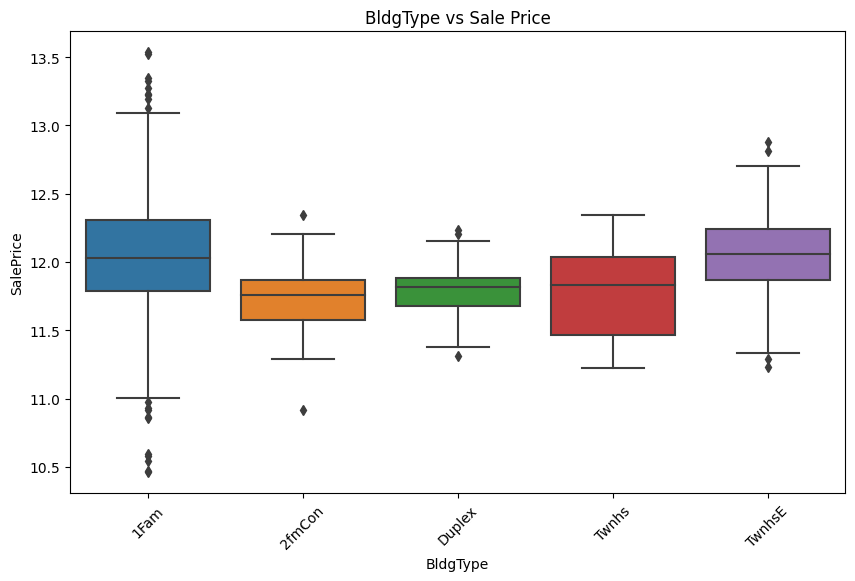

<Figure size 640x480 with 0 Axes>

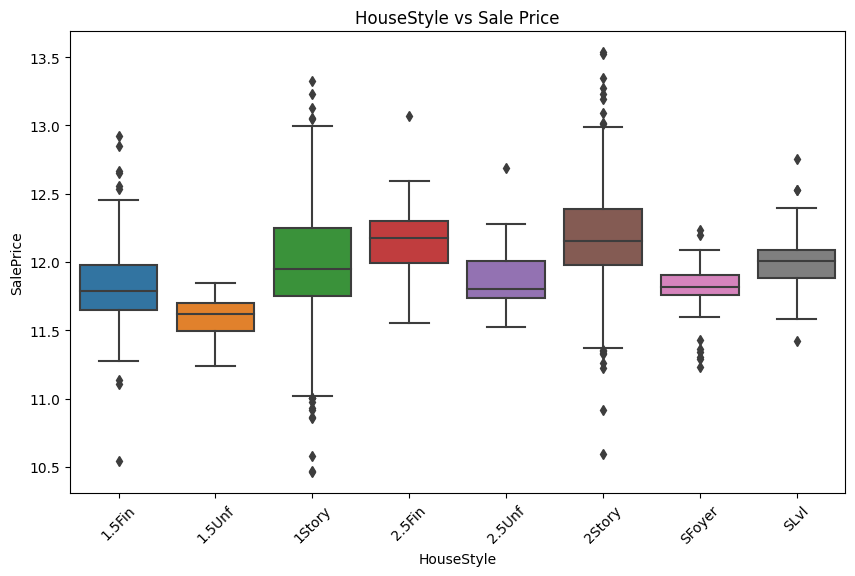

<Figure size 640x480 with 0 Axes>

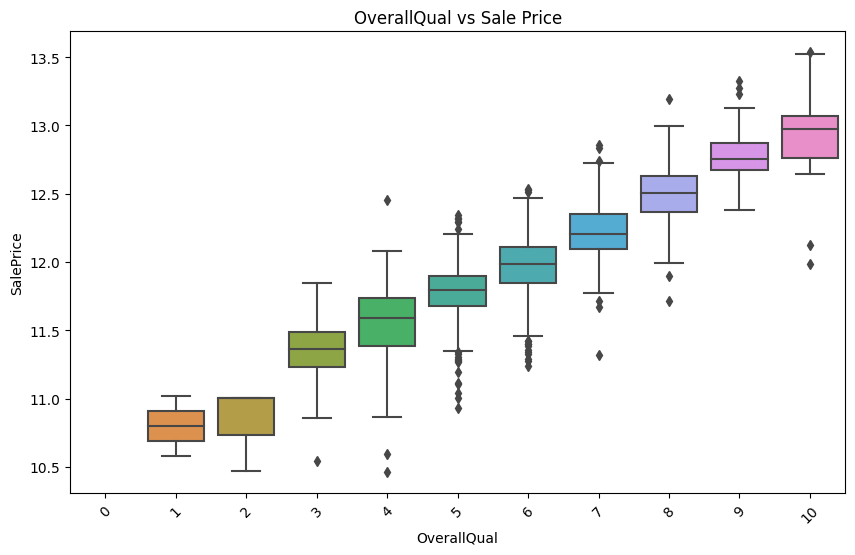

<Figure size 640x480 with 0 Axes>

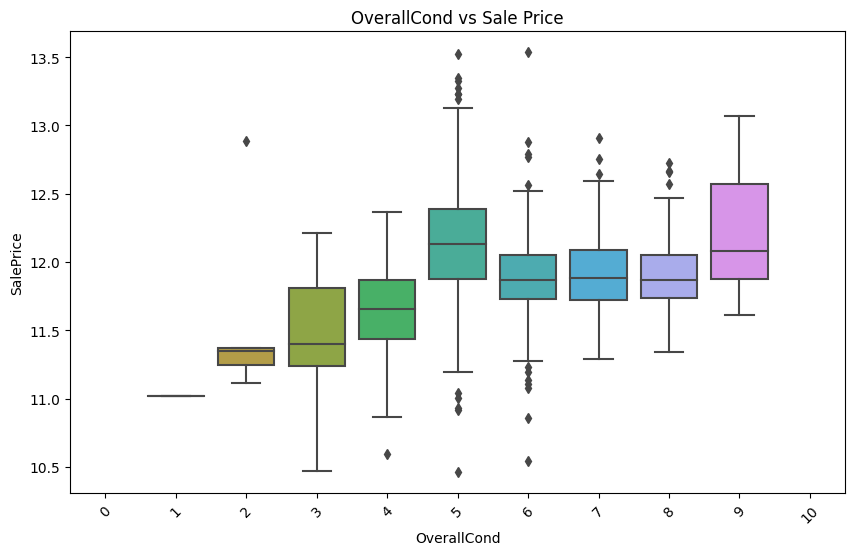

<Figure size 640x480 with 0 Axes>

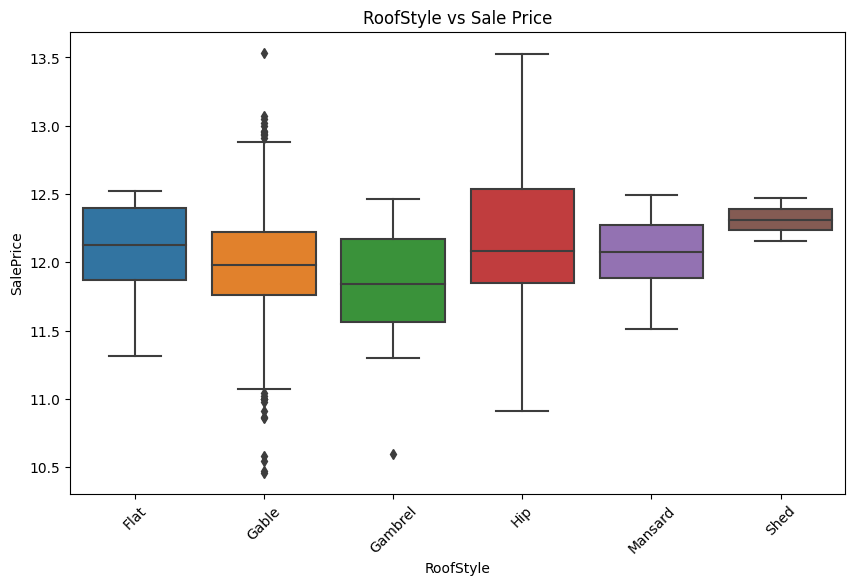

<Figure size 640x480 with 0 Axes>

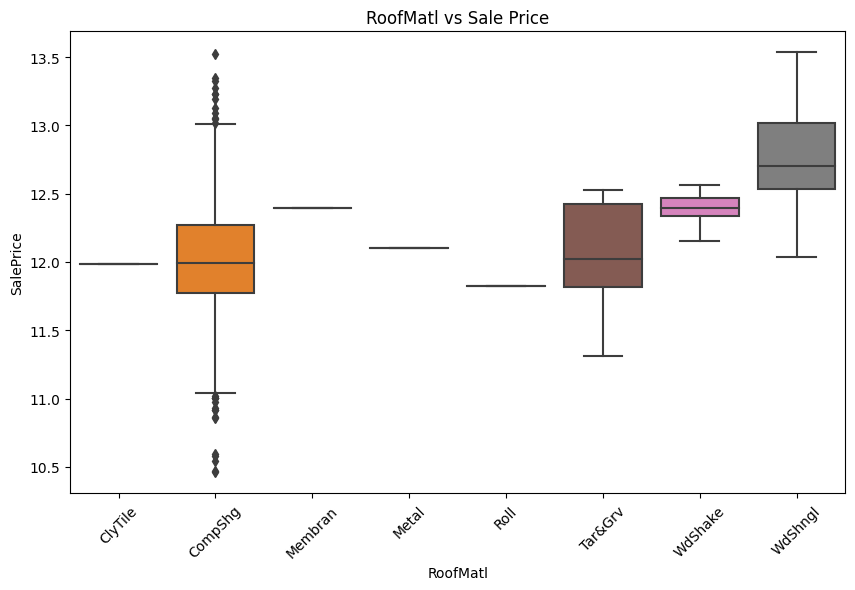

<Figure size 640x480 with 0 Axes>

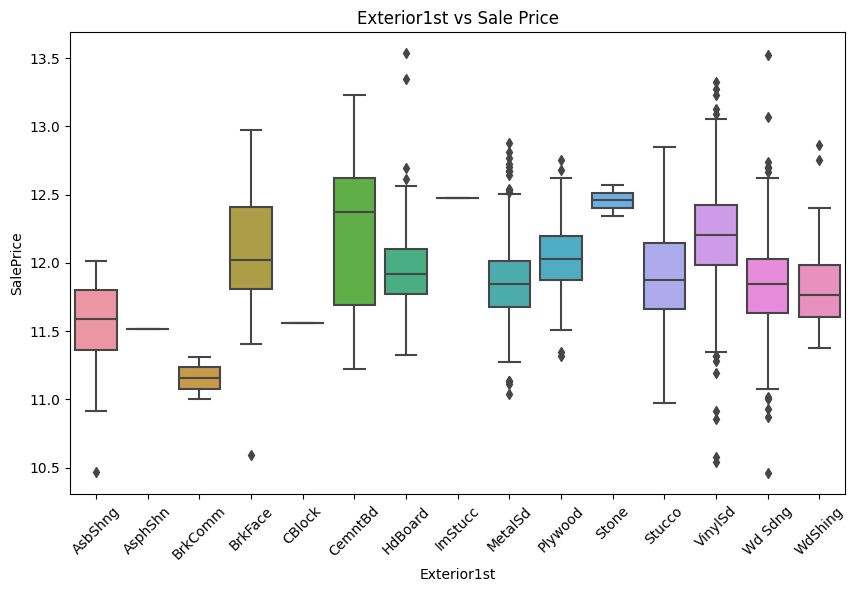

<Figure size 640x480 with 0 Axes>

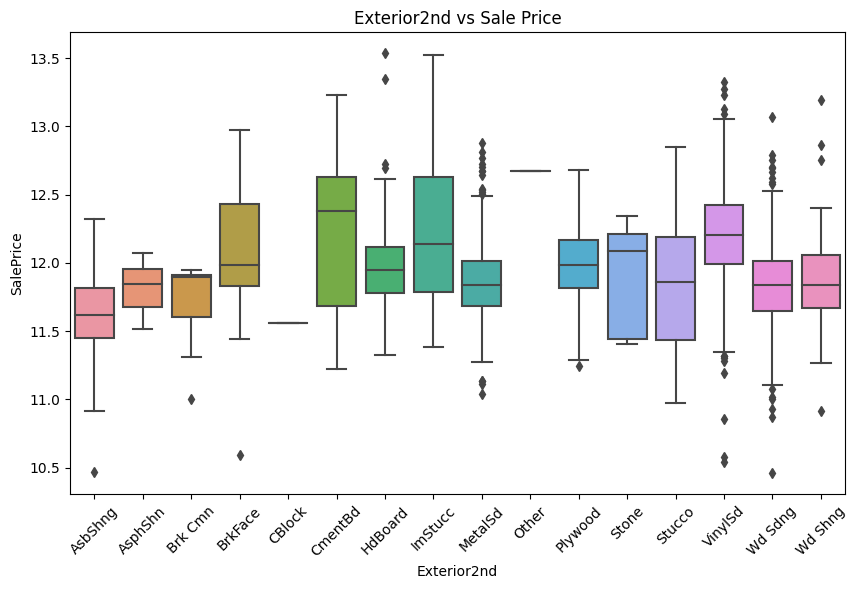

<Figure size 640x480 with 0 Axes>

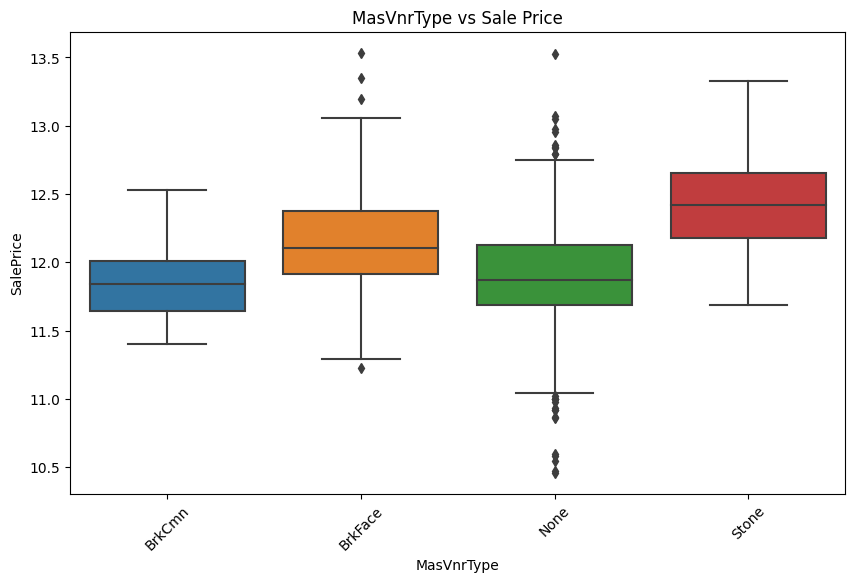

<Figure size 640x480 with 0 Axes>

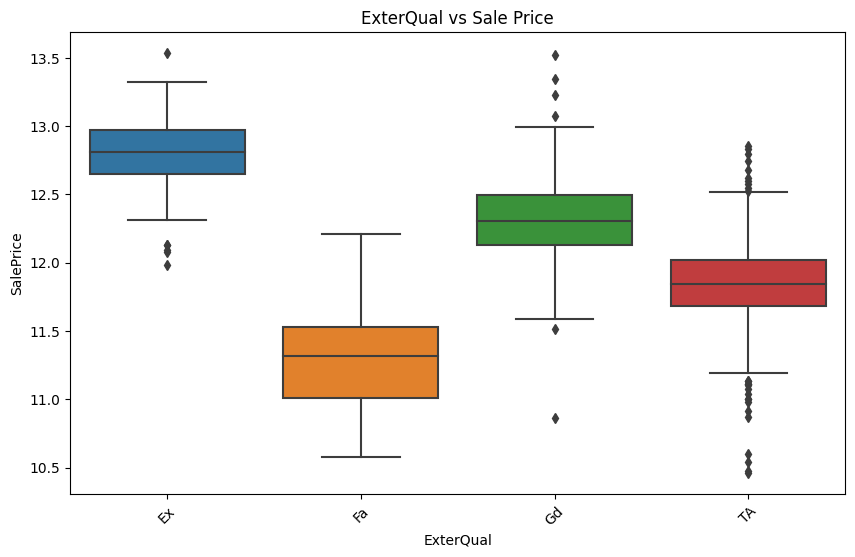

<Figure size 640x480 with 0 Axes>

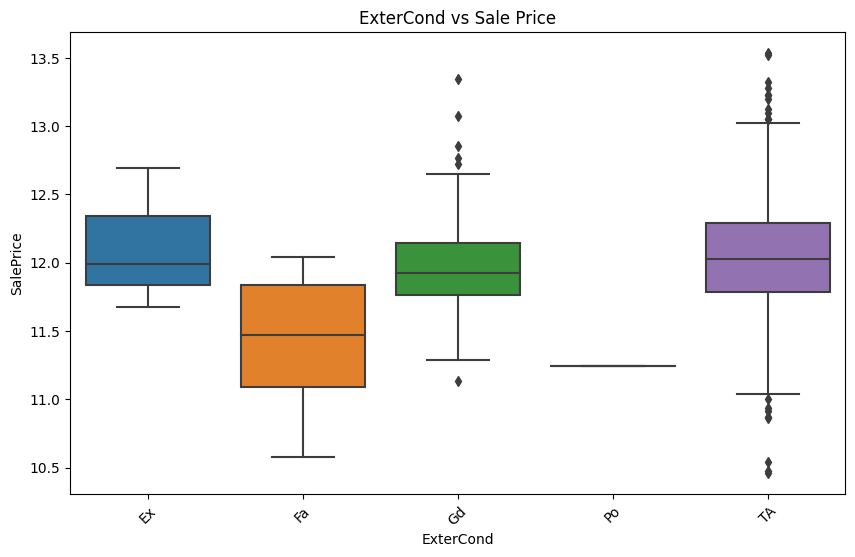

<Figure size 640x480 with 0 Axes>

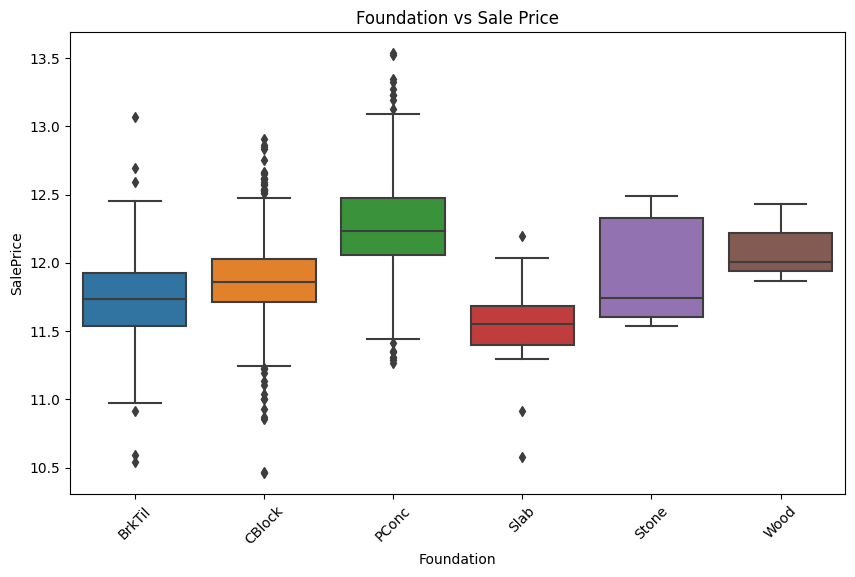

<Figure size 640x480 with 0 Axes>

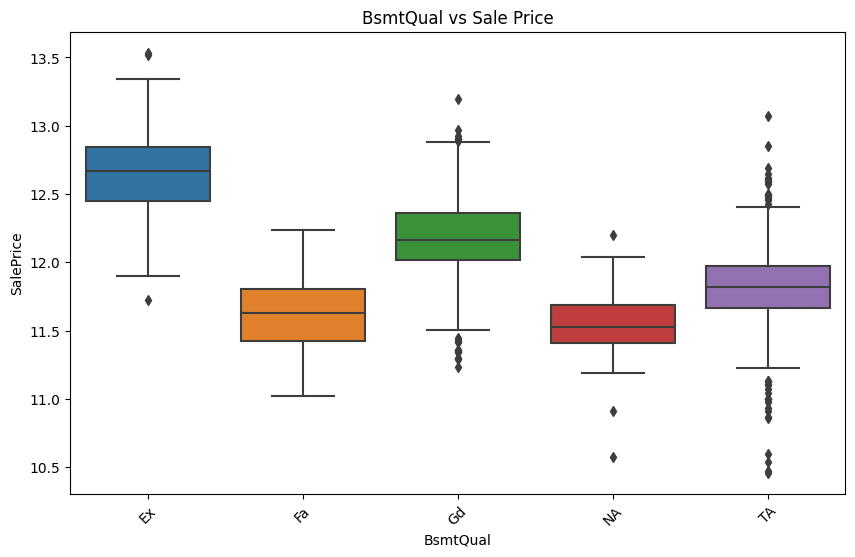

<Figure size 640x480 with 0 Axes>

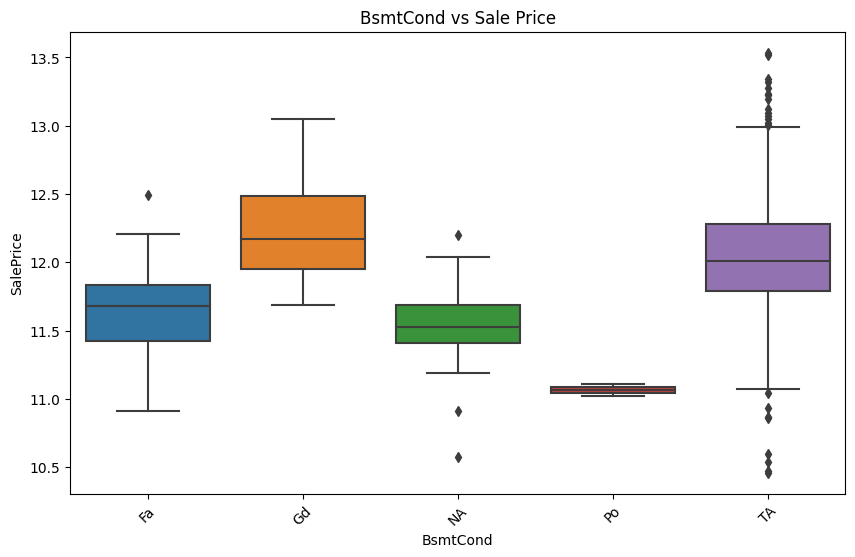

<Figure size 640x480 with 0 Axes>

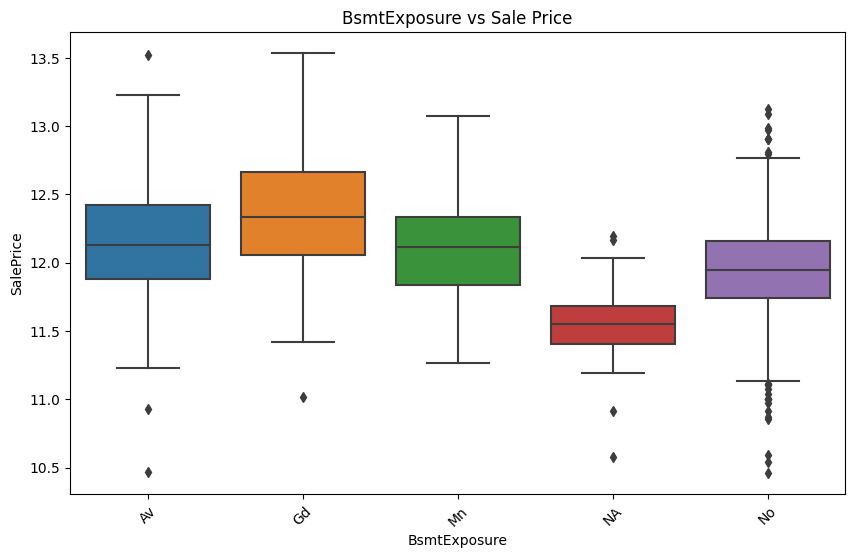

<Figure size 640x480 with 0 Axes>

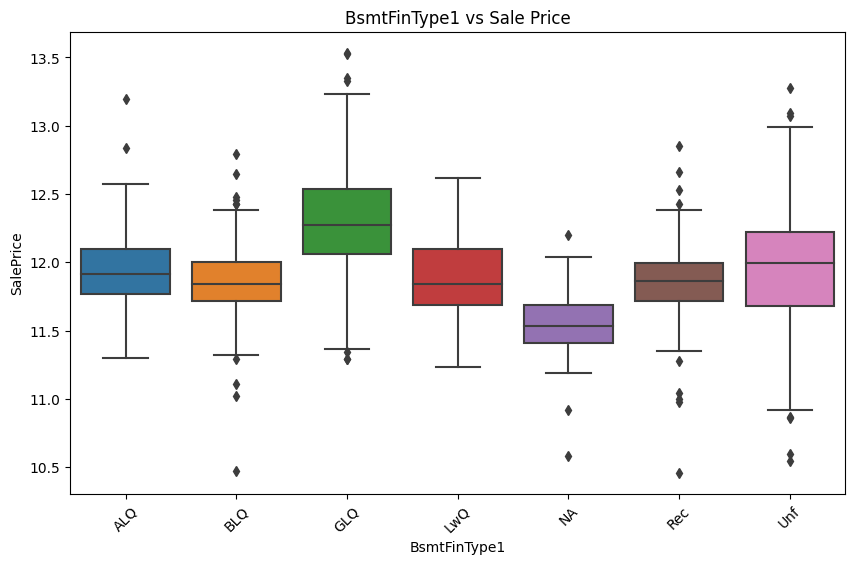

<Figure size 640x480 with 0 Axes>

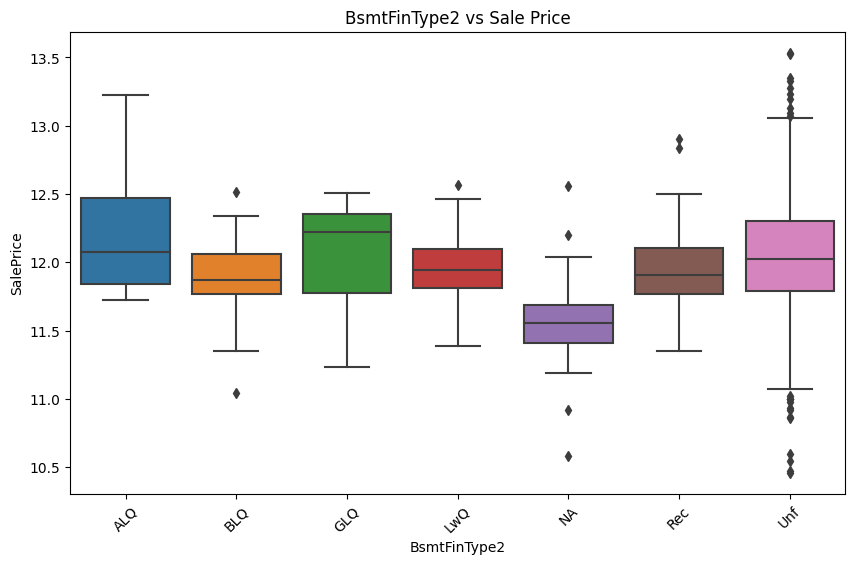

<Figure size 640x480 with 0 Axes>

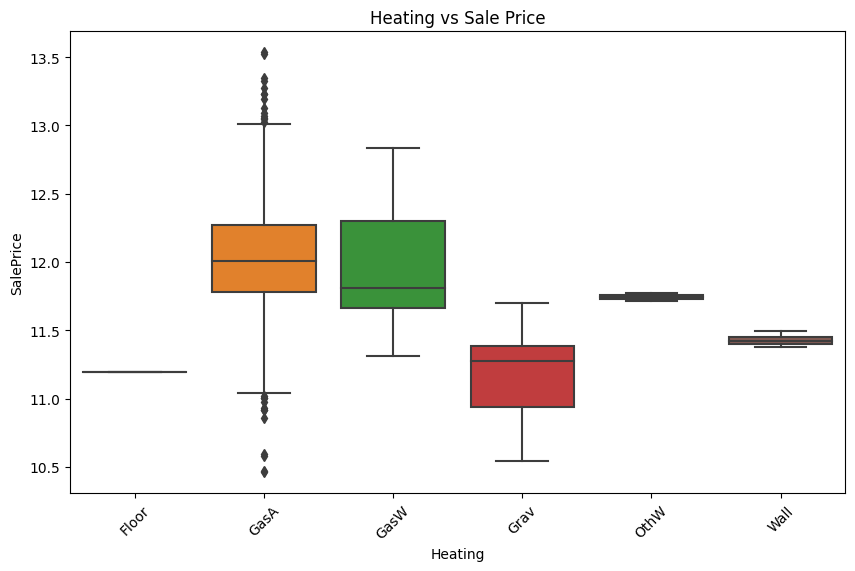

<Figure size 640x480 with 0 Axes>

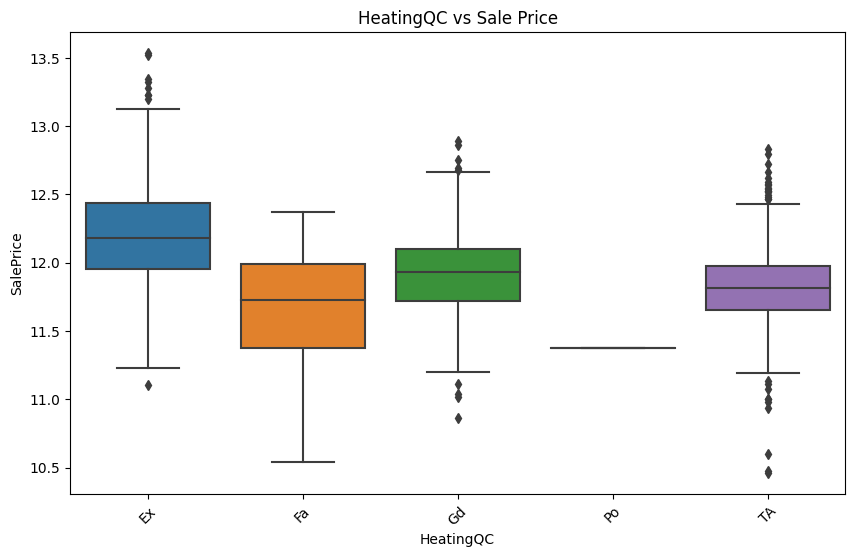

<Figure size 640x480 with 0 Axes>

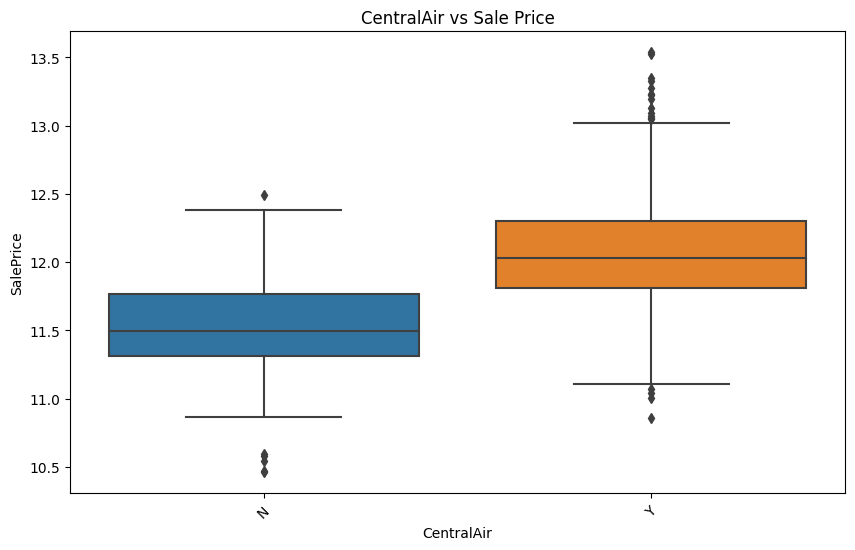

<Figure size 640x480 with 0 Axes>

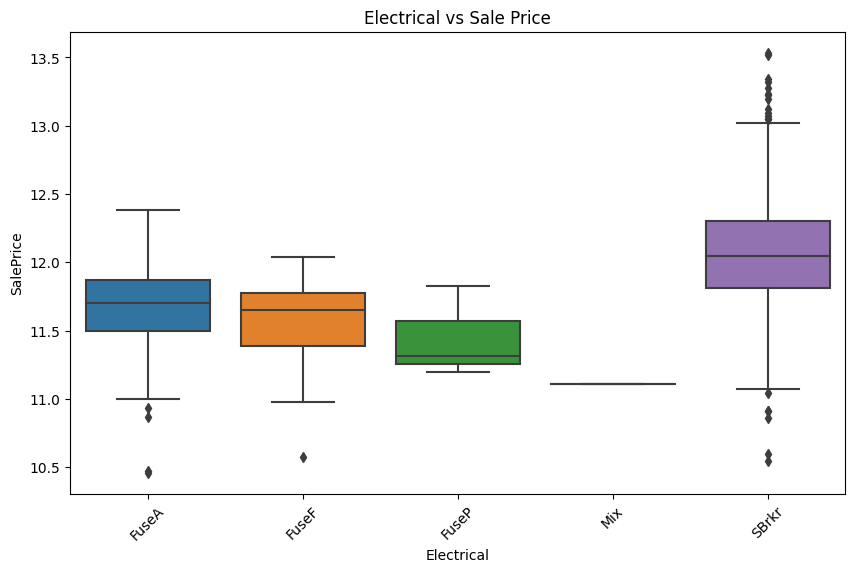

<Figure size 640x480 with 0 Axes>

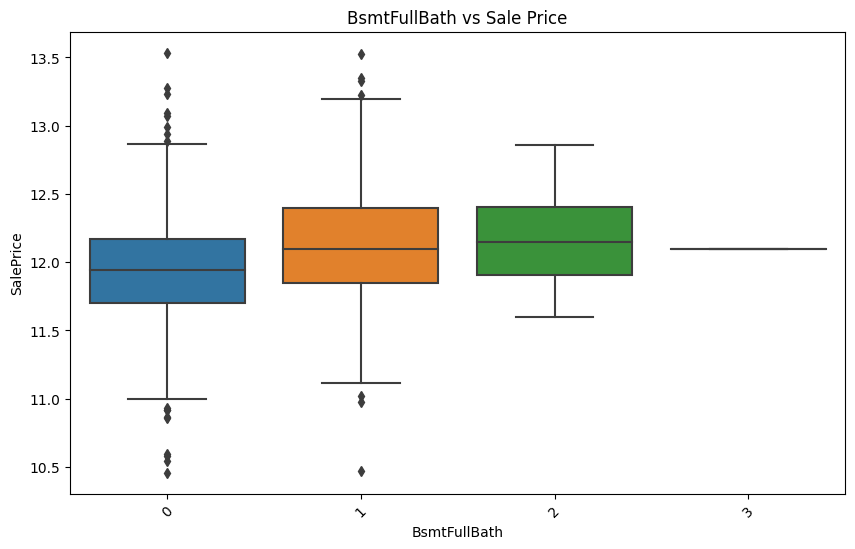

<Figure size 640x480 with 0 Axes>

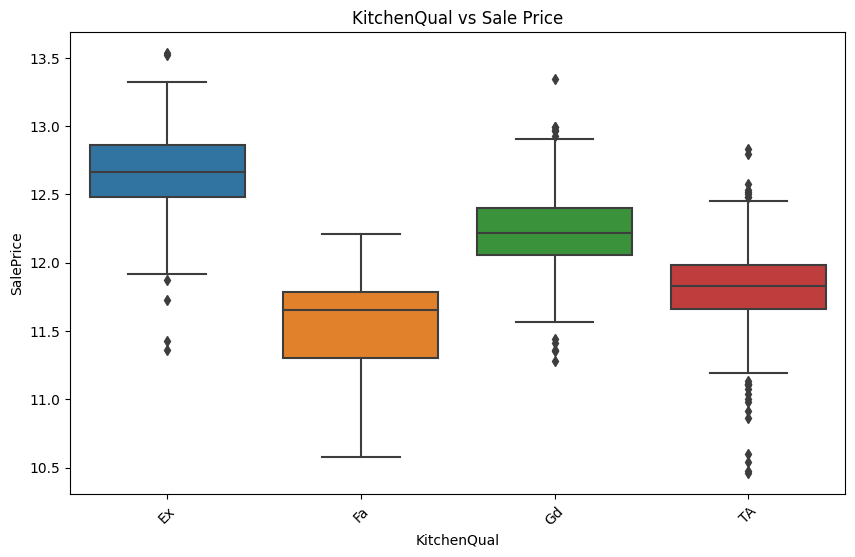

<Figure size 640x480 with 0 Axes>

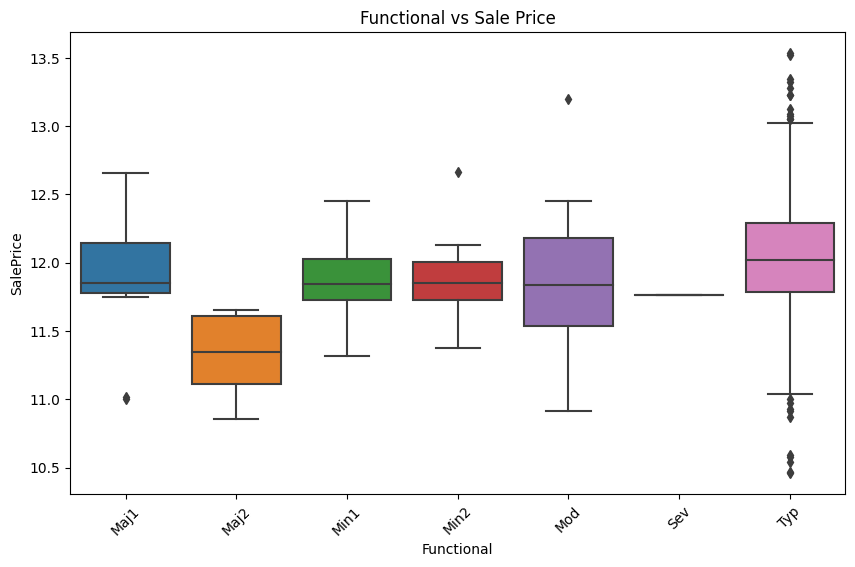

<Figure size 640x480 with 0 Axes>

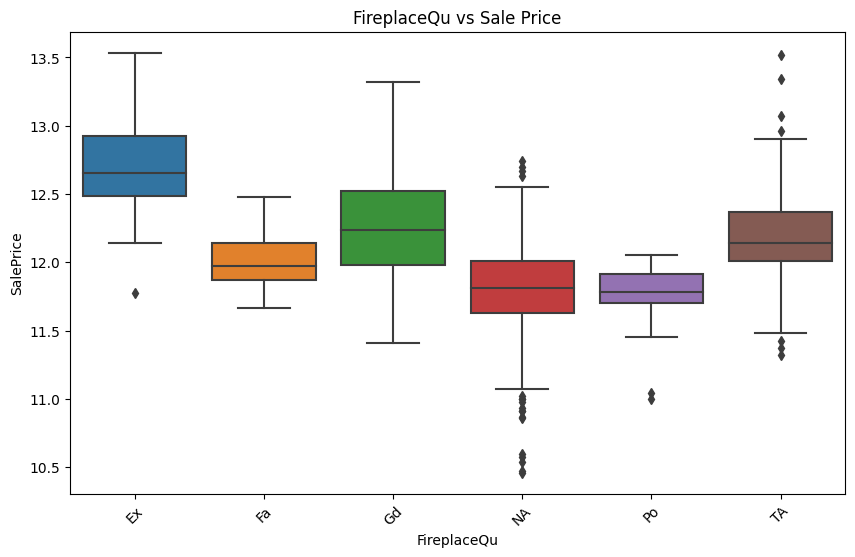

<Figure size 640x480 with 0 Axes>

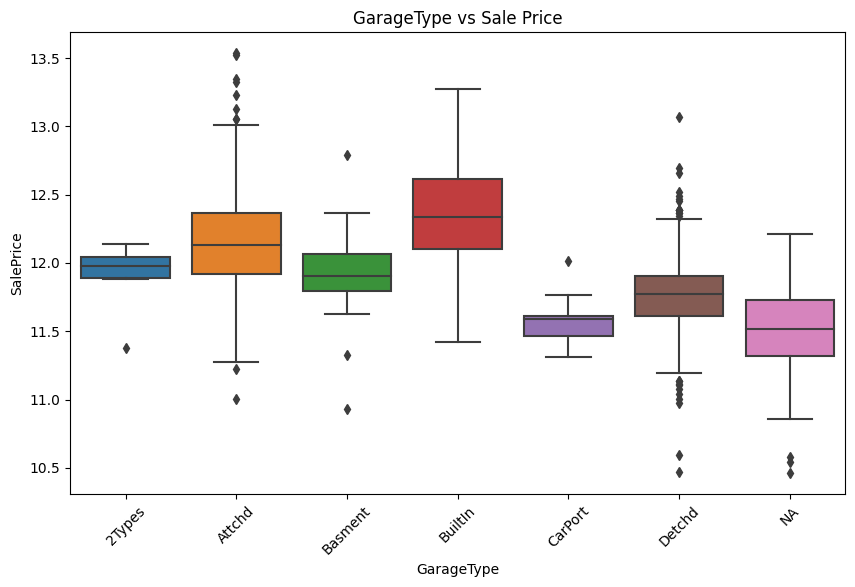

<Figure size 640x480 with 0 Axes>

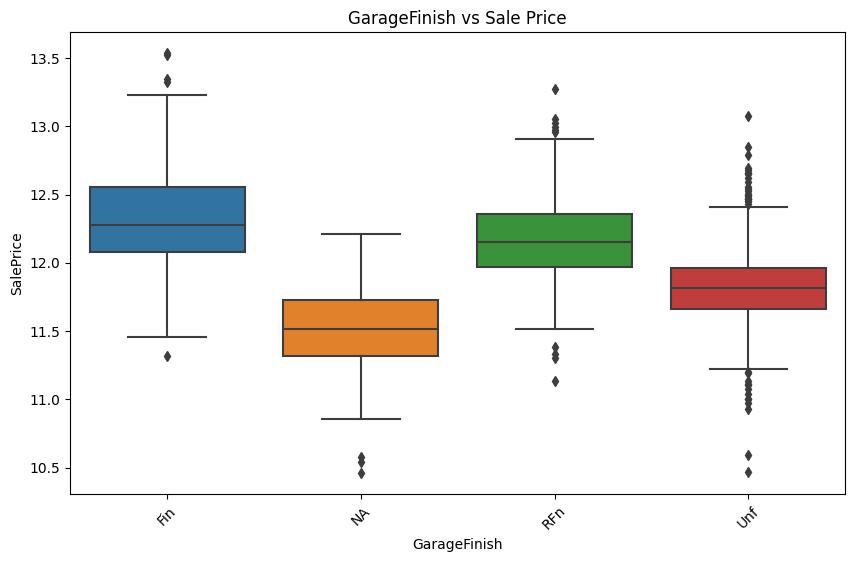

<Figure size 640x480 with 0 Axes>

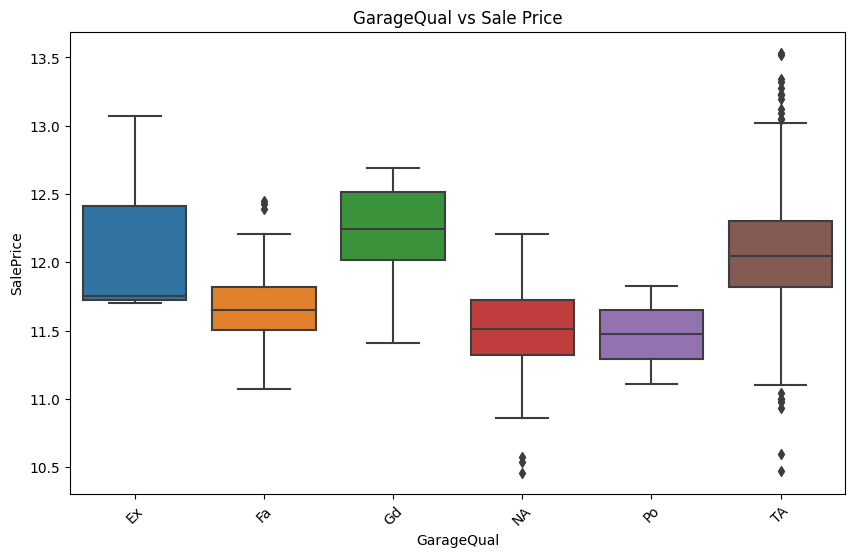

<Figure size 640x480 with 0 Axes>

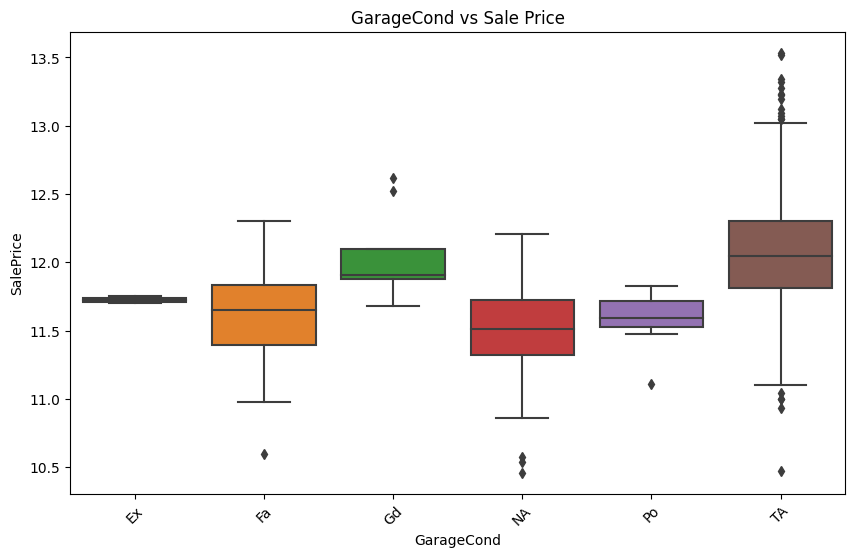

<Figure size 640x480 with 0 Axes>

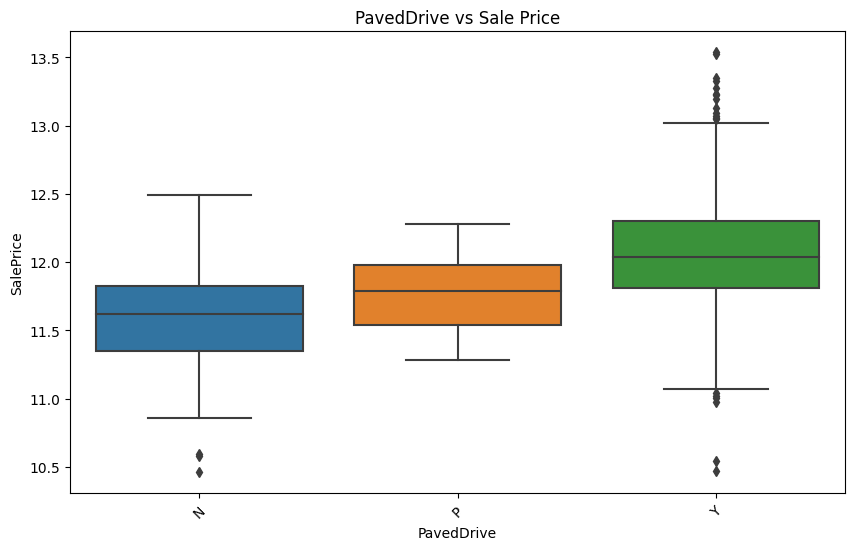

<Figure size 640x480 with 0 Axes>

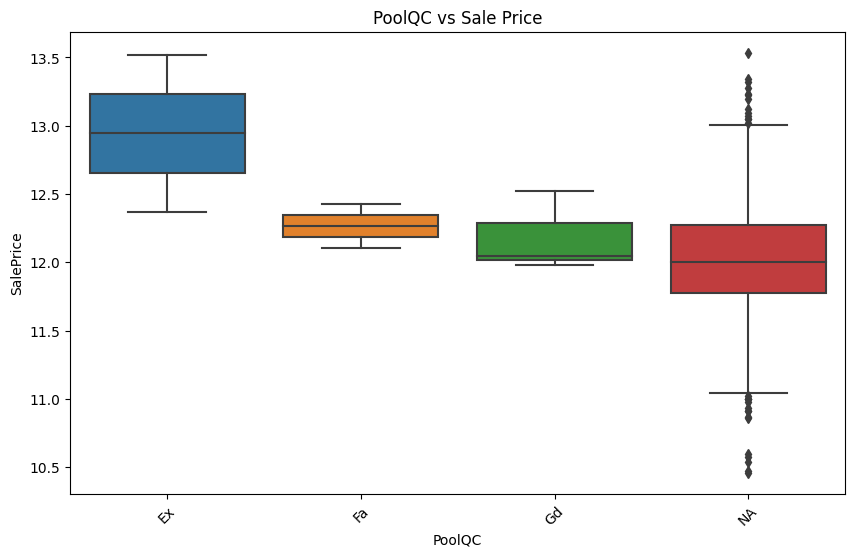

<Figure size 640x480 with 0 Axes>

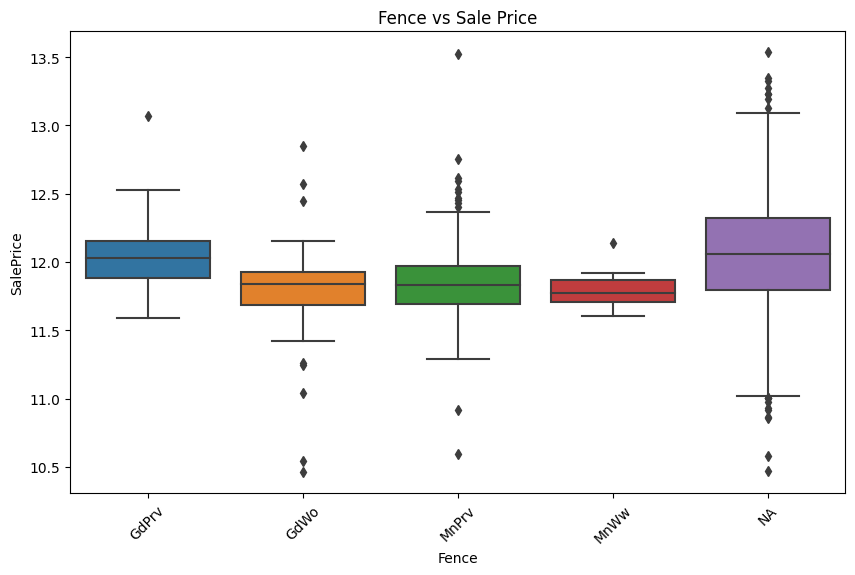

<Figure size 640x480 with 0 Axes>

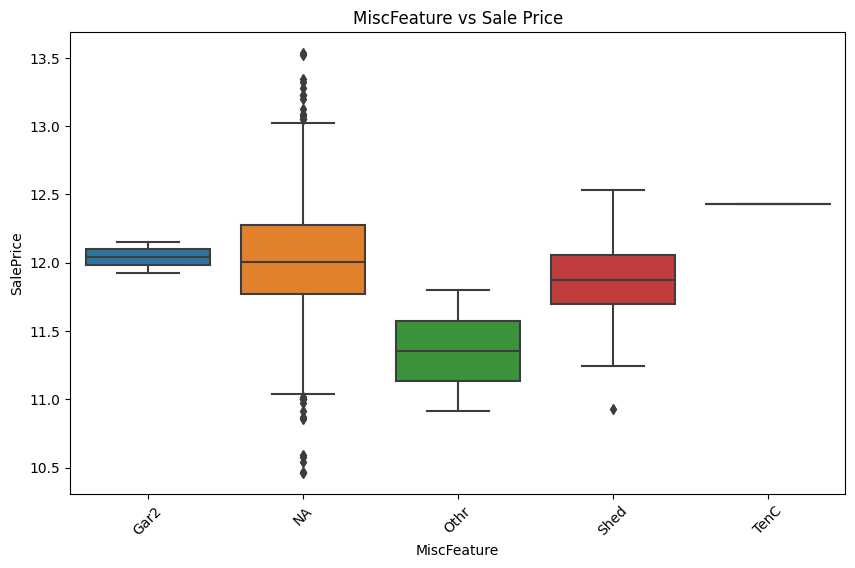

<Figure size 640x480 with 0 Axes>

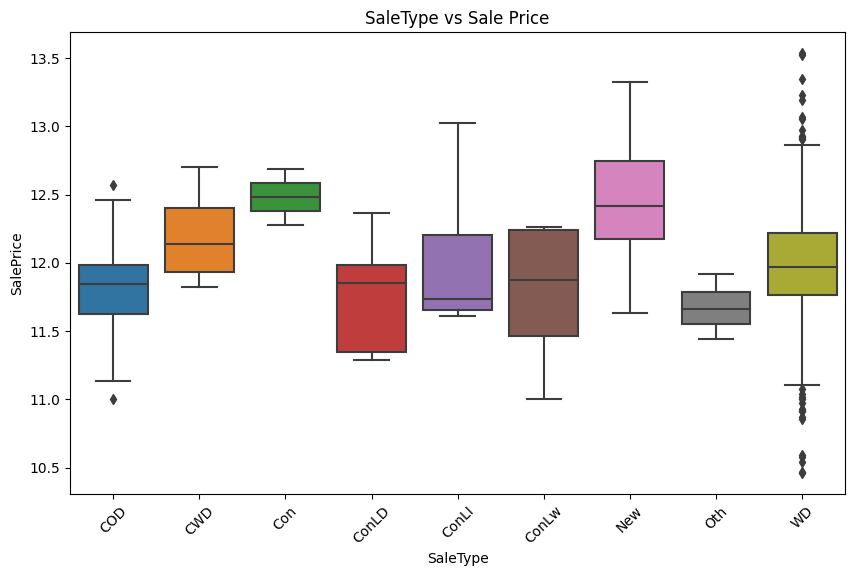

<Figure size 640x480 with 0 Axes>

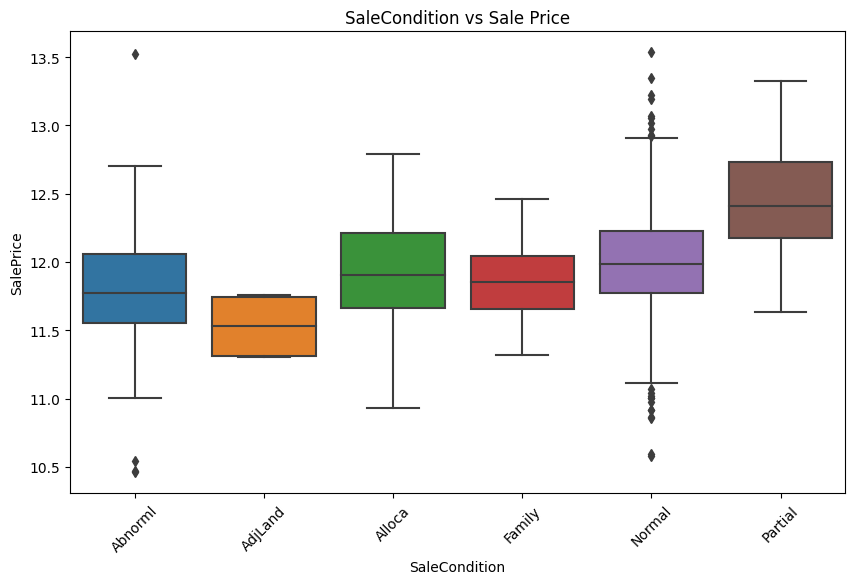

<Figure size 640x480 with 0 Axes>

In [35]:
for i in datacat:
    if i in ['OverallQual','OverallCond']:
        plt.figure(figsize = (10, 6))
        sns.boxplot(x=i, y='SalePrice', data=pd.concat([data,target], axis=1), order = ['0','1','2','3','4','5','6','7','8','9','10'])
        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
        plt.xticks(rotation=45)
        plt.title(i + " vs Sale Price")
        plt.savefig(i + " vs Sale Price")
        plt.show()
        plt.clf()
    else:
        plt.figure(figsize = (10, 6))
        sns.boxplot(x=i, y='SalePrice', data=pd.concat([data,target], axis=1), order = sorted(list(data[i].unique())))
        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
        plt.xticks(rotation=45)
        plt.title(i + " vs Sale Price")
        plt.savefig(i + " vs Sale Price")
        plt.show()
        plt.clf()

### 3.2.1 - Testing Variables for Normallity

For us to analyze if the features in each categorical have different means (ANOVA) first we need to test for normality of the SalePrice on each feature. It shows a sample of the tests conducted that the KS p-value is below our critical value. Due to rejecting the hypothesis for the values to follow a normal distribution we will need to use the non-parametric ANOVA on these variables.

In [54]:
full_data = pd.concat([data,target], axis=1)
normality = pd.DataFrame()
normality['column'] = []
normality['feature'] = []
normality['KS p-value'] = []
for col in datacat:
    for i in sorted(list(data[col].unique())):
        #if len(tog[tog[col]==i]['SalePrice']) == 0:
        #    pass
        #else:
        oi = stats.kstest(((full_data[full_data[col]==i]['SalePrice']-full_data[full_data[col]==i]['SalePrice'].mean())/full_data[full_data[col]==i]['SalePrice'].std()),'norm')[1]
        normality.loc[len(normality.index)] = [col, i, oi]
normality[normality['KS p-value'] <0.01].to_excel('normality for ANOVA.xlsx')
normality[normality['KS p-value'] <0.01]

column  feature  KS p-value
4      MSSubClass       20    0.000772
18       MSZoning       RL    0.005521
28       LotShape      Reg    0.005061
51   Neighborhood  Gilbert    0.003175
103   OverallQual        5    0.006796
120     RoofStyle      Hip    0.002988
169     ExterQual       TA    0.004088
185      BsmtQual       TA    0.002159
190      BsmtCond       TA    0.006034
211       Heating     GasA    0.008579
222    CentralAir        Y    0.002154
227    Electrical    SBrkr    0.008615
235   KitchenQual       TA    0.006563
250    GarageType   Attchd    0.009245
256  GarageFinish      Fin    0.009546
259  GarageFinish      Unf    0.003204
265    GarageQual       TA    0.002136
271    GarageCond       TA    0.002438
274    PavedDrive        Y    0.005999

In [37]:
data_nonp_anova = list(normality[normality['KS p-value'] <0.01]['column'].unique())
data_anova = list(set(datacat).difference(data_nonp_anova))

### 3.2.2 - ANOVA

Regarding the ANOVA results, we found that ‘Street’, ‘Utilities’, ‘LandSlope’ and ‘Condition2’, does not play a role in explaining the sale price, while in the others we would reject the null hypothesis (means are equal) therefore there is a factor effect .

In [38]:
from scipy.stats import f_oneway

In [57]:
ANOVA = pd.DataFrame()
ANOVA['Column'] = []
ANOVA['f_one way p-value'] =[]
for col in data_anova:
    params = [full_data[full_data[col]==list(full_data[col].unique())[i]]['SalePrice'] for i in range(len(list(full_data[col].unique())))]
    ANOVA.loc[len(ANOVA.index)] = [col,f_oneway(*params)[1]] 
ANOVA.to_excel('ANOVA Results.xlsx')
ANOVA

Column  f_one way p-value
0     OverallCond       9.270535e-53
1       LandSlope       3.388375e-01
2        SaleType       5.497893e-36
3          Street       2.837931e-02
4     Exterior2nd       2.429938e-49
5       ExterCond       6.540305e-14
6    BsmtFullBath       1.424832e-18
7       LotConfig       6.214575e-07
8      Condition2       1.382042e-02
9    BsmtFinType1       4.321404e-78
10  SaleCondition       1.689708e-41
11     Foundation      1.350671e-111
12          Fence       6.560319e-13
13     HouseStyle       1.636077e-30
14      HeatingQC       1.614882e-82
15    FireplaceQu      6.963458e-115
16     MasVnrType       1.670061e-65
17       RoofMatl       4.504239e-04
18    Exterior1st       1.053128e-53
19    LandContour       3.086224e-08
20   BsmtExposure       2.590707e-47
21         PoolQC       7.695551e-03
22          Alley       1.358108e-09
23      Utilities       6.296094e-01
24     Functional       4.250370e-06
25       BldgType       3.436794e-12
26     Condition1       1.173444e-10
27    MiscFeature       6.059928e-03
28   BsmtFinType2       5.805632e-12

In [58]:
ANOVA = pd.DataFrame()
ANOVA['Column'] = []
ANOVA['f_one way p-value'] =[]
for col in data_nonp_anova:
    params = [tog[tog[col]==list(tog[col].unique())[i]]['SalePrice'] for i in range(len(list(tog[col].unique())))]
    ANOVA.loc[len(ANOVA.index)] = [col,stats.kruskal(*params)[1]] 
ANOVA.to_excel('NP ANOVA Results.xlsx')
ANOVA

Column  f_one way p-value
0     MSSubClass      1.896860e-104
1       MSZoning       3.080724e-57
2       LotShape       1.640323e-32
3   Neighborhood      6.696799e-168
4    OverallQual      3.506973e-202
5      RoofStyle       1.580733e-07
6      ExterQual      8.180798e-148
7       BsmtQual      1.209826e-144
8       BsmtCond       3.465401e-25
9        Heating       3.331280e-06
10    CentralAir       5.319642e-33
11    Electrical       1.850352e-27
12   KitchenQual      4.720113e-143
13    GarageType      7.581344e-112
14  GarageFinish      7.534250e-132
15    GarageQual       1.458782e-39
16    GarageCond       2.431209e-39
17    PavedDrive       7.012268e-26

In [41]:
data_twoway =['Street','Utilities','LandSlope','Condition2']